# **Proyecto Integrador** Expansión Estratégica de Biogenesys

In [8]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **AVANCE N°1** Carga y Transformación de los Datos de Biogenesys

In [3]:
#Importar archivo csv
data_latam = pd.read_csv("data_latinoamerica.csv",sep = ",")

In [4]:
#Exploración de datos
data_latam.head(4)

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  

[4 rows x 50 columns]

In [5]:
#Comprobar data cargada
data_latam.shape

(12216057, 50)

In [6]:
#Explorar data cargada
data_latam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

In [7]:
# Convertir la columna 'date' a tipo datetime
data_latam['date'] = pd.to_datetime(data_latam['date'])

In [8]:
#Comprobar cambio de formato de columna date
data_latam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   location_key                           object        
 1   date                                   datetime64[ns]
 2   country_code                           object        
 3   country_name                           object        
 4   new_confirmed                          float64       
 5   new_deceased                           float64       
 6   cumulative_confirmed                   float64       
 7   cumulative_deceased                    float64       
 8   cumulative_vaccine_doses_administered  float64       
 9   population                             float64       
 10  population_male                        float64       
 11  population_female                      float64       
 12  population_rural                       float64       


In [22]:
# Lista de países a seleccionar
data_latam_paises = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
# Filtrar el DataFrame para seleccionar solo los países especificados
data_latam_filtro_paises = data_latam[data_latam['country_name'].isin(data_latam_paises)]

In [23]:
#Comprobar data
data_latam_filtro_paises.shape

(11970289, 50)

In [24]:
# Analizar calidad de datos
data_latam_filtro_paises.isnull().sum()[data_latam_filtro_paises.isnull().sum()> 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [27]:
#Analizar calidad data
data_latam_filtro_paises.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

In [28]:
# Filtro de paises por codigo
data_latam_paises_codigo = data_latam_filtro_paises[data_latam_filtro_paises["location_key"].isin(['CO', 'AR', 'CL', 'MX', 'PE', 'BR'])]


In [29]:
#Comprobar nueva data de paises seleccionados por codigo
data_latam_paises_codigo.shape

(5946, 50)

In [30]:
#Filtrado por fecha
data_latam_f=data_latam_paises_codigo[data_latam_paises_codigo["date"]>"2021-01-01"]

In [31]:
#Comprobar nueva data de paises seleccionados
data_latam_f.shape

(3744, 50)

In [32]:
# Analizar calidad de datos
data_latam_f.isnull().sum()[data_latam_f.isnull().sum()> 0]

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

In [33]:
# Lista de columnas para reemplazar los valores nulos con la media por país
columnas_a_reemplazar = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 
    'cumulative_deceased','average_temperature_celsius', 
    'minimum_temperature_celsius', 'maximum_temperature_celsius', 
    'rainfall_mm', 'relative_humidity'
]
# Reemplazar los valores nulos en las columnas especificadas con la media por país
for columna in columnas_a_reemplazar:
    data_latam_f.loc[:,columna] = data_latam_f.groupby('country_name')[columna].transform(lambda x: x.fillna(x.mean()))

In [34]:
# Reemplazar los valores nulos en las columnas especificadas con el valor 0
data_latam_f.loc[:, ['new_recovered', 'cumulative_recovered', 'cumulative_vaccine_doses_administered']] = data_latam_f.loc[:, ['new_recovered', 'cumulative_recovered', 'cumulative_vaccine_doses_administered']].fillna(0)

In [37]:
# Analizar calidad de datos
data_latam_f.isnull().sum()[data_latam_f.isnull().sum()> 0]


Series([], dtype: int64)

In [38]:
data_latam_f.shape

(3744, 50)

In [63]:
#creacion de archivo csv con data filtrada
data_latam_f.to_csv("DatosFinalesFiltrado.csv",index=False)

In [9]:
#Importar archivo csv con datos fltrados
data_latam_filtrada= pd.read_csv("DatosFinalesFiltrado.csv",sep = ",")

In [160]:
#Estadistica descriptiva de columnas 
for i in data_latam_filtrada.columns:
    print(i)
    print(data_latam_filtrada[i].describe())
    print("..............")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
..............
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
..............
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
..............
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
..............
new_confirmed
count      3744.000000
mean      13922.215021
std       24219.185381
min           0.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
..............
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64
...........

In [161]:
# Crear una función para cambiar valores negativos a positivos
def cambiar_a_positivo(valor):
    if isinstance(valor, (int, float)):  # Verificar si el valor es un número
        return abs(valor)  # Devolver el valor absoluto
    else:
        return valor  # Devolver el valor sin cambios si no es un número

# Aplicar la función a las columnas 'new_confirmed' y 'new_recovered' usando .loc y .applymap()
data_latam_f.loc[:, ['new_confirmed', 'new_recovered']] = data_latam_f.loc[:, ['new_confirmed', 'new_recovered']].applymap(cambiar_a_positivo)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25976\3854882290.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_latam_f.loc[:, ['new_confirmed', 'new_recovered']] = data_latam_f.loc[:, ['new_confirmed', 'new_recovered']].applymap(cambiar_a_positivo)


In [162]:
def calcular_estadistica (data):
    for i  in data.columns:
        if data[i].dtype=="float64" or data [i].dtype=="int64":
            print(i)
            print("Mediana:",data[i].median())
            print("Varianza:",data[i].var())
            print("Rango:",data[i].max()-data[i].min())
            print("Moda:",data[i].mode())
            print("..............")
calcular_estadistica(data_latam_f) 

new_confirmed
Mediana: 5214.0
Varianza: 586568940.5043616
Rango: 298408.0
Moda: 0    0.0
Name: new_confirmed, dtype: float64
..............
new_deceased
Mediana: 100.5
Varianza: 257292.4462981465
Rango: 11447.0
Moda: 0    0.0
Name: new_deceased, dtype: float64
..............
cumulative_confirmed
Mediana: 3632143.5
Varianza: 63828420109841.22
Rango: 34567862.0
Moda: 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
..............
cumulative_deceased
Mediana: 139614.0
Varianza: 33415397832.126804
Rango: 6852

### **AVANCE N°2** Análisis Exploratorio – Visualización

In [163]:
#Estadistica descriptiva de columnas 
for i in data_latam_filtrada.columns:
    print(i)
    print(data_latam_filtrada[i].describe())
    print("..............")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
..............
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
..............
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
..............
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
..............
new_confirmed
count      3744.000000
mean      13922.215021
std       24219.185381
min           0.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
..............
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      11447.000000
Name: new_deceased, dtype: float64
...........

In [164]:
data_latam_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [3]:
# Convertir la columna 'date' a tipo datetime
data_latam_filtrada['date'] = pd.to_datetime(data_latam_filtrada['date'])
data_latam_filtrada.set_index("date",inplace=True)

In [169]:
data_latam_filtrada.shape

(3744, 50)

In [100]:
#Seleccion de paises a evaluar 
pais_seleccionado=["Argentina","Brazil","Chile","Colombia","Peru","Mexico"]

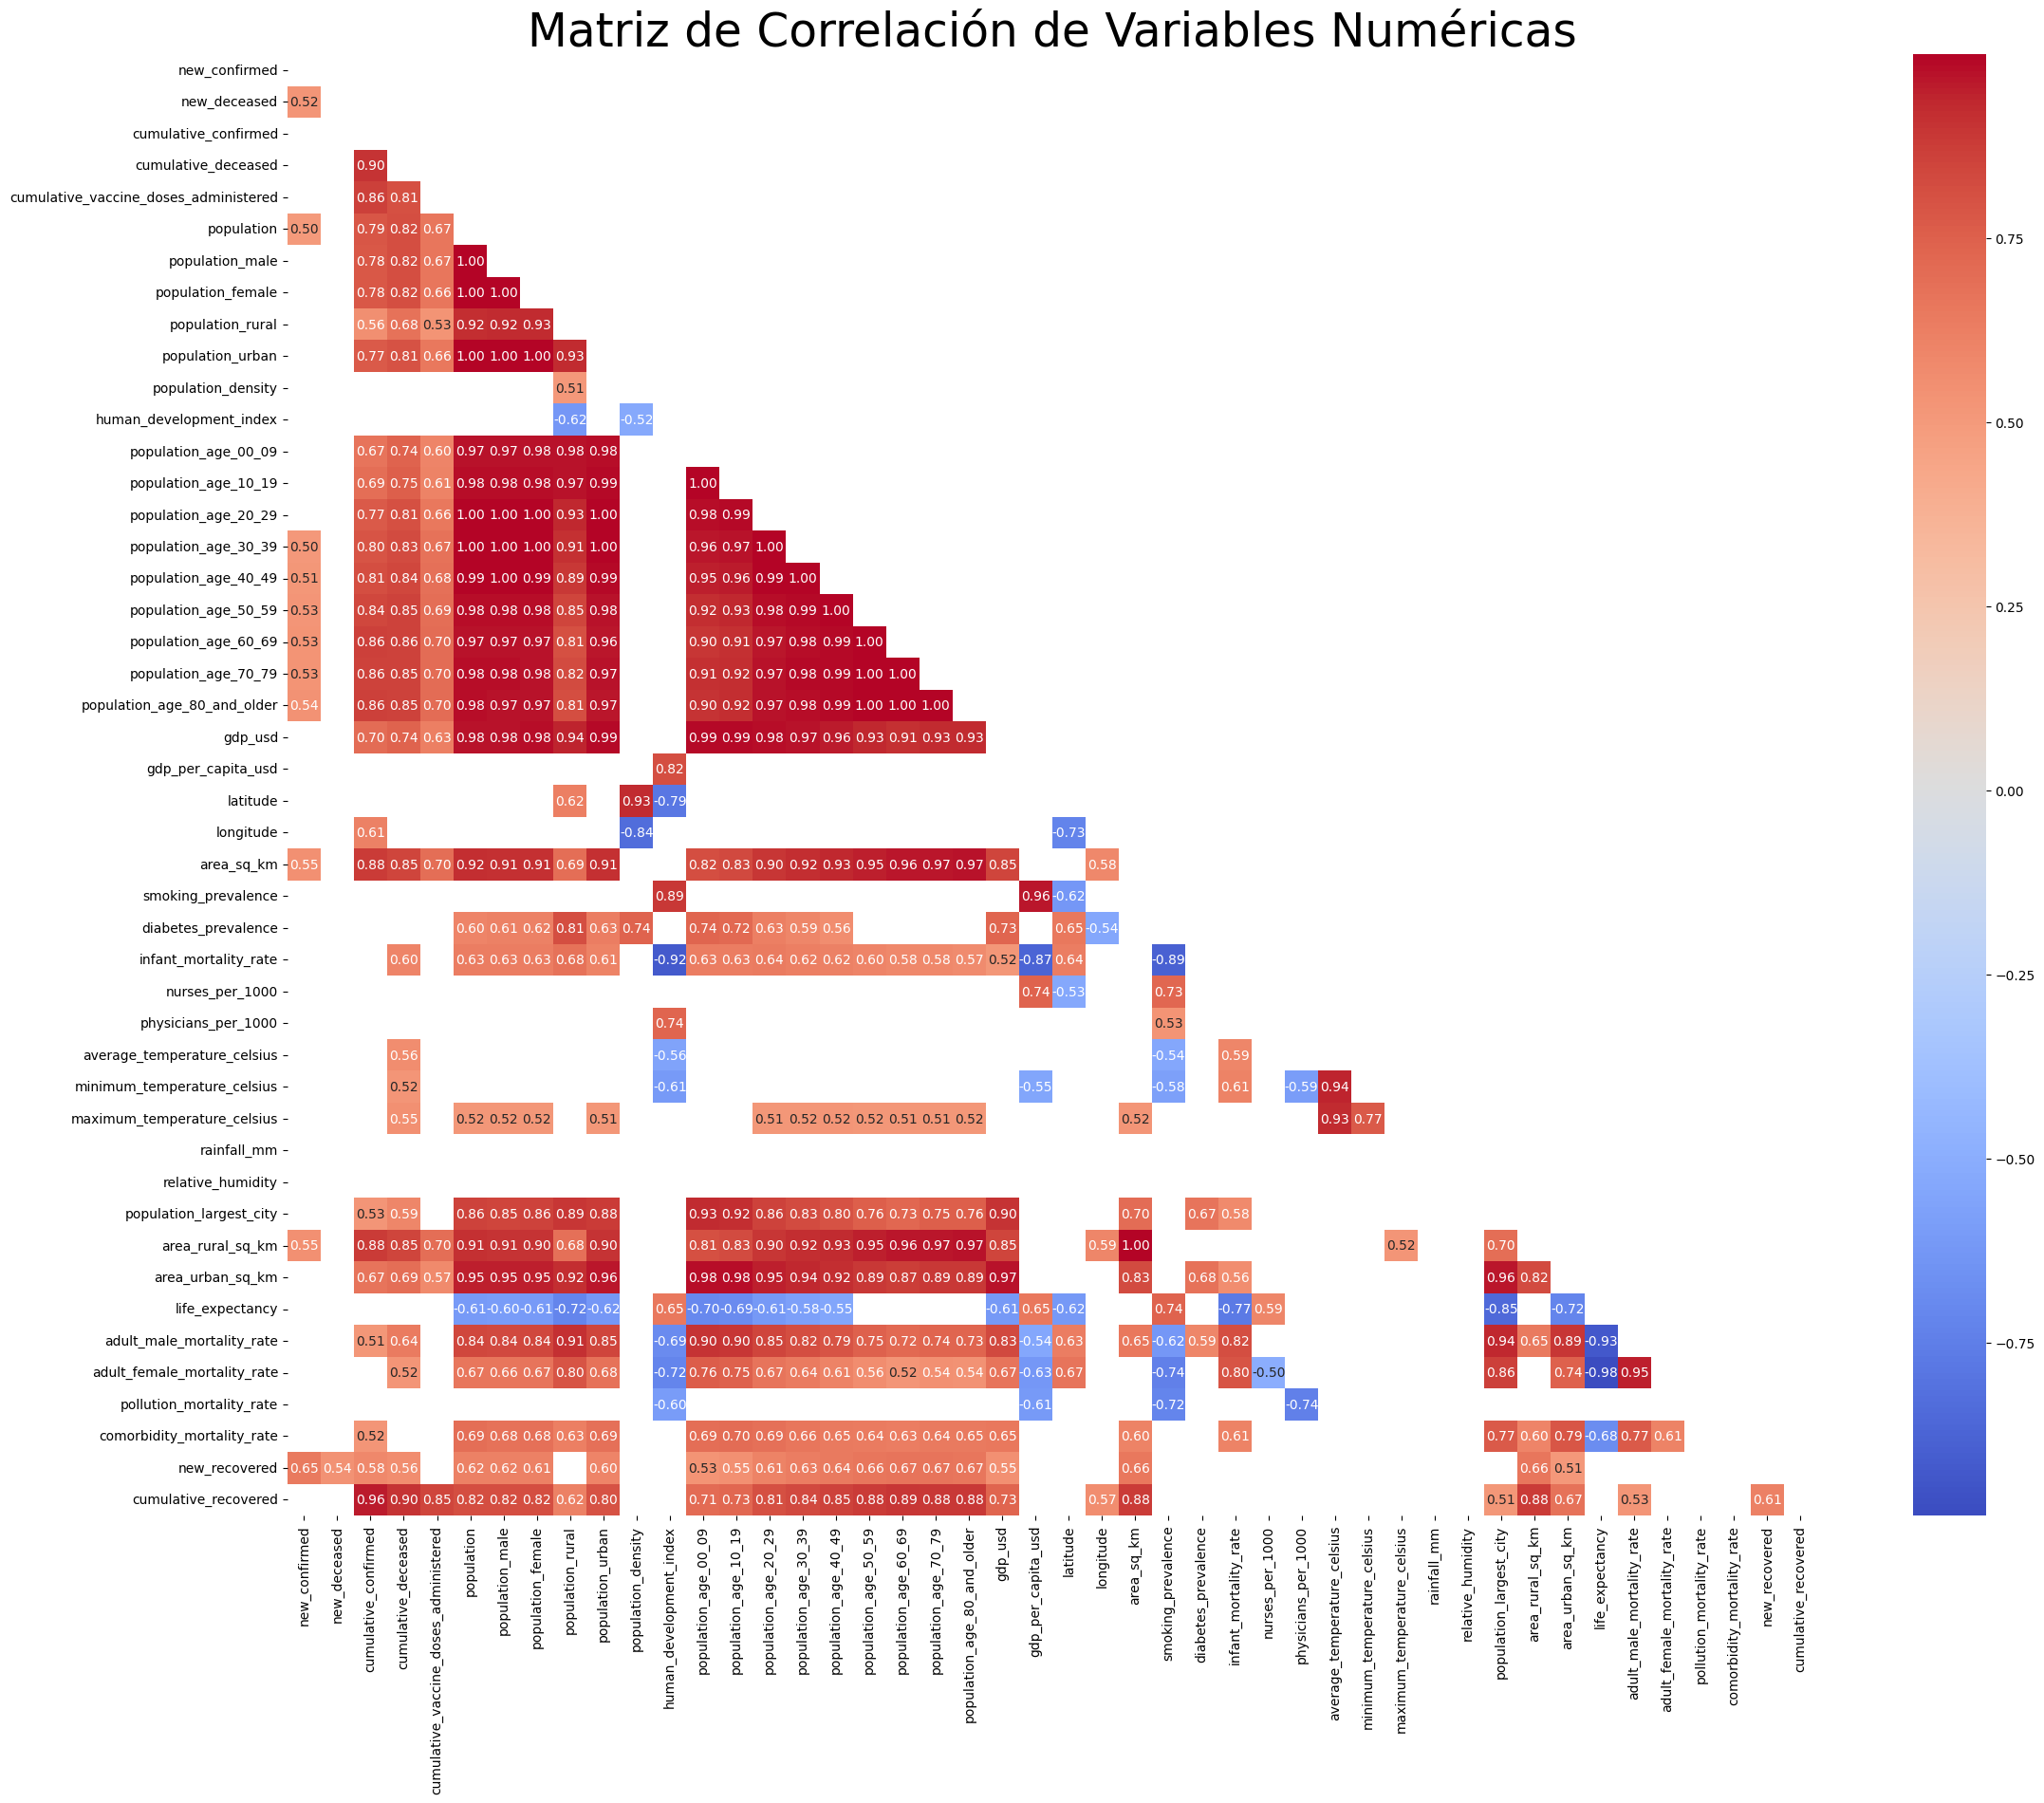

In [170]:
# Obtener las columnas numéricas
numeric_columns = data_latam_filtrada.select_dtypes(include=["float64", "int64"]).columns
# Calcular la matriz de correlación
correlation_matrix = data_latam_filtrada[numeric_columns].corr()
# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Seleccionar valores superiores a 0.5, donde existe una correlación fuerte
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]
# Crear la gráfica
plt.figure(figsize=(26,20 ))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=35)
plt.show()

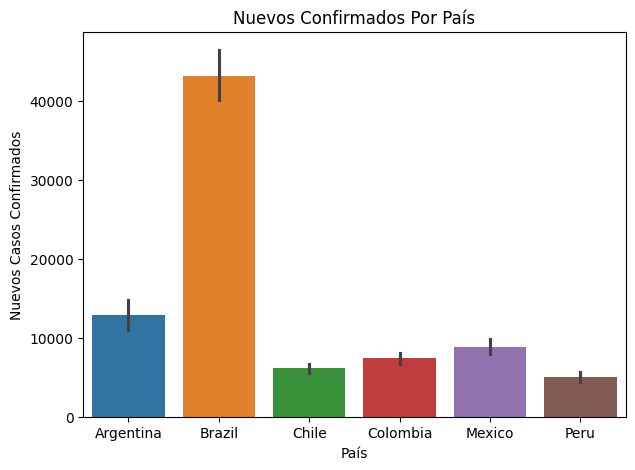

In [131]:
fig,ax=plt.subplots(figsize=(7,5))
sns.barplot(x="country_name",y="new_confirmed",data=data_latam_filtrada,ax=ax,hue="country_name")
plt.title("Nuevos Confirmados Por País")
plt.xlabel('País')
plt.ylabel('Nuevos Casos Confirmados')
plt.show()

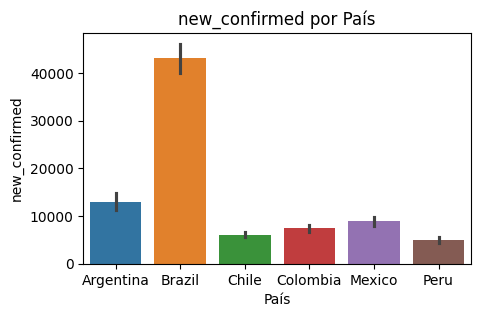

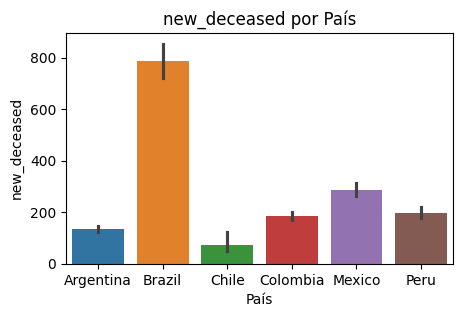

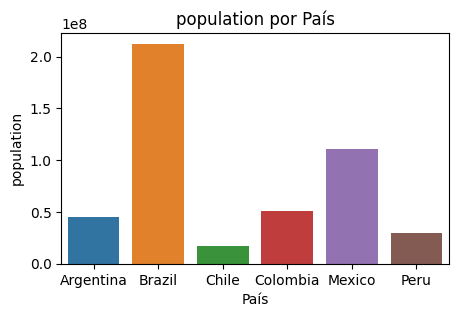

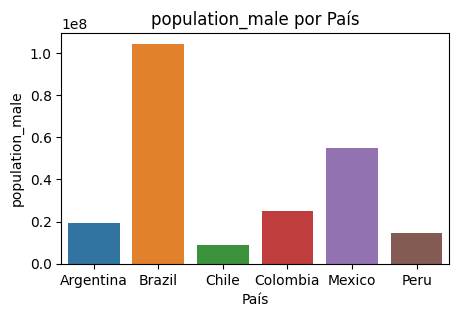

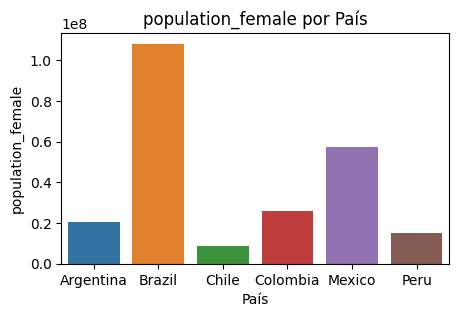

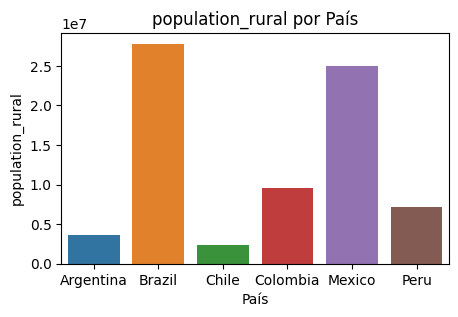

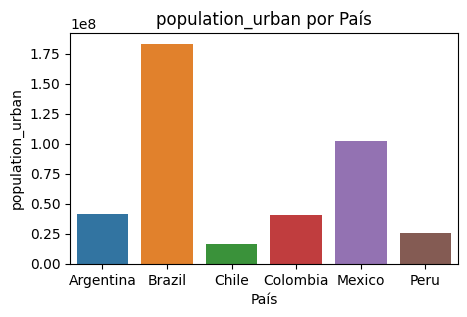

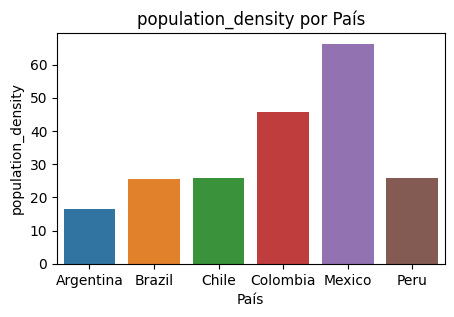

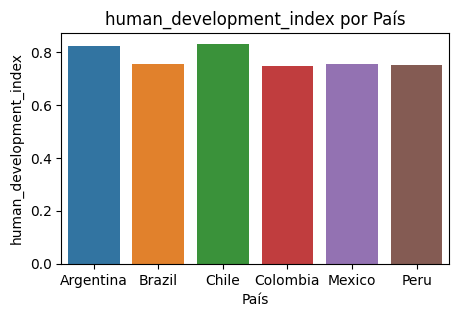

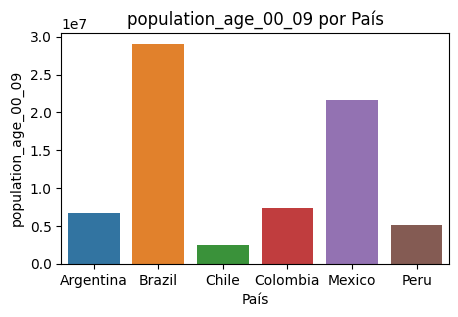

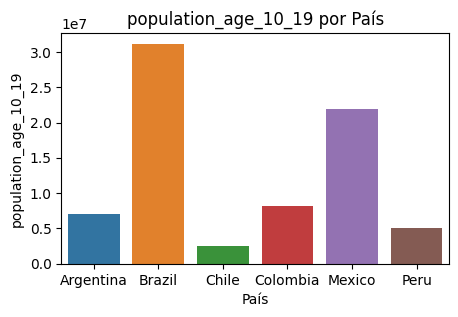

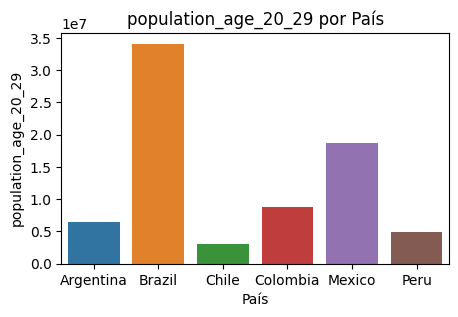

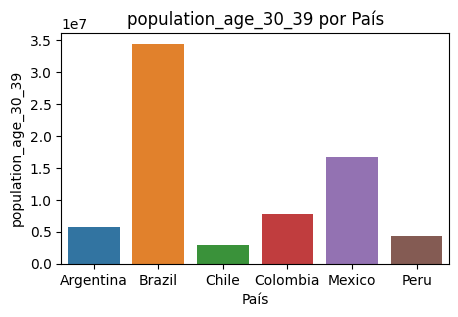

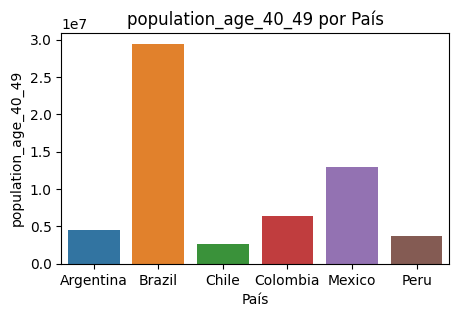

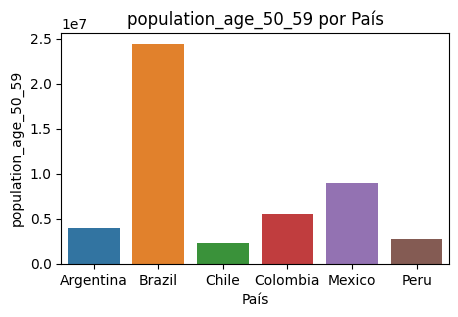

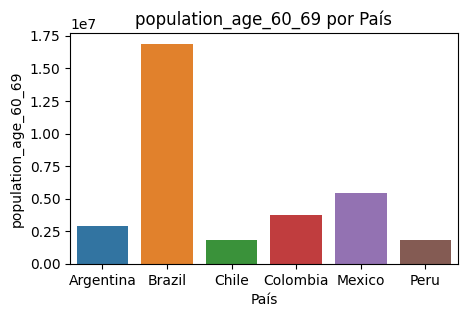

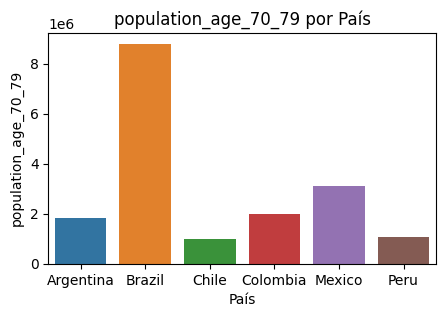

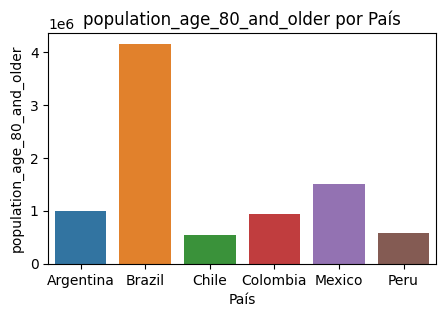

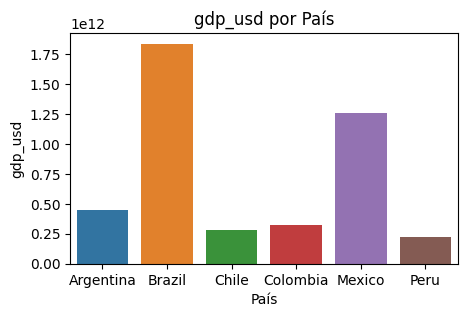

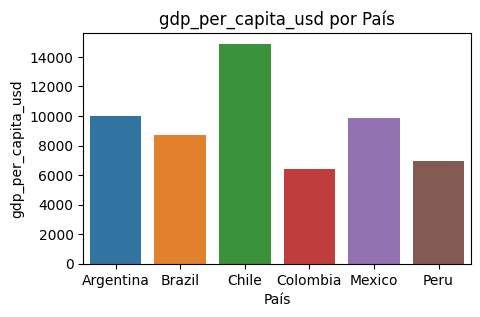

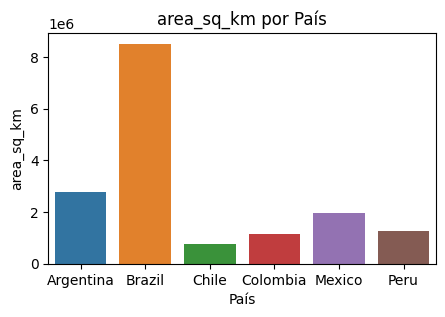

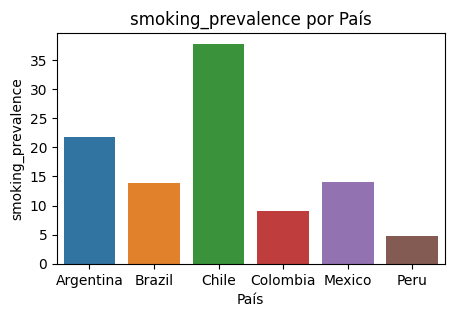

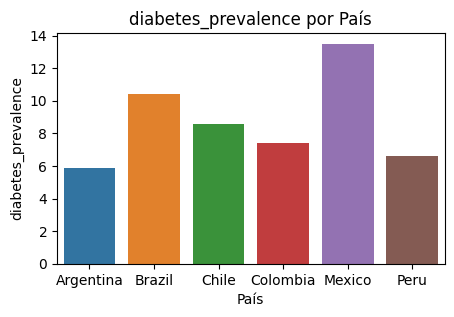

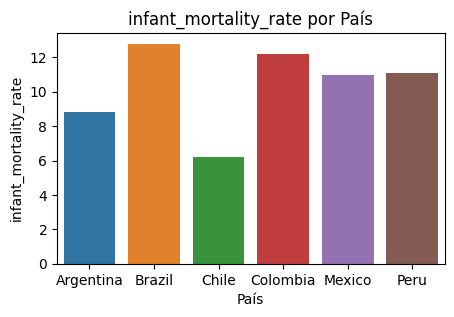

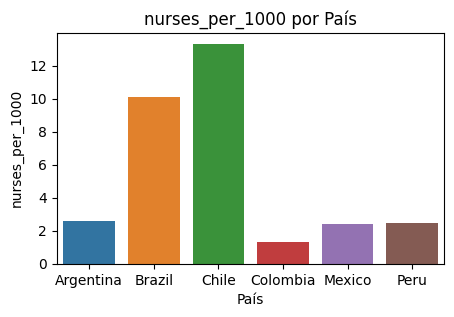

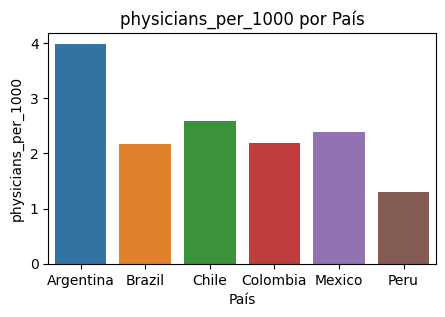

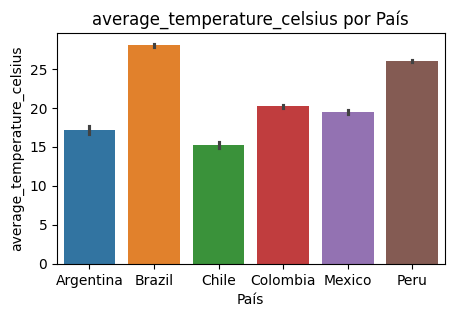

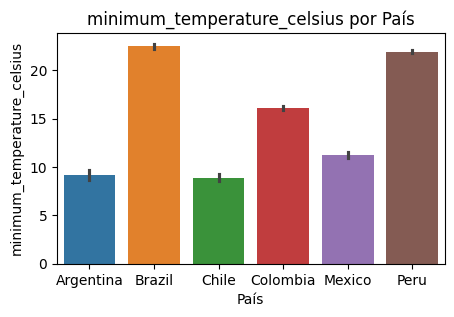

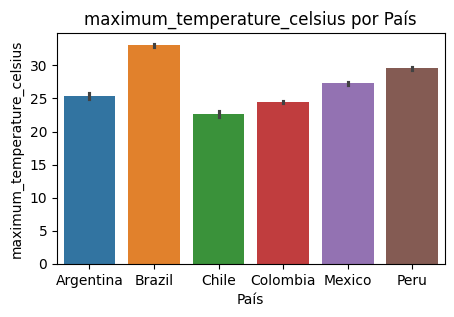

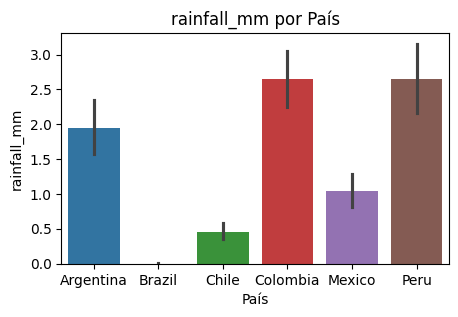

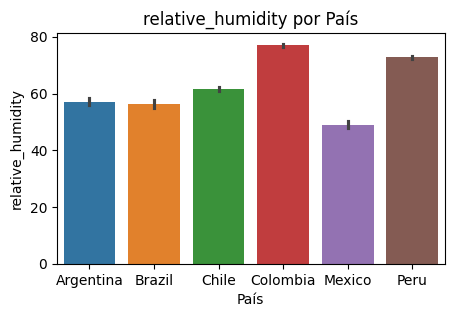

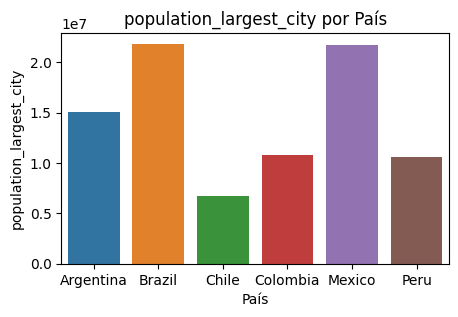

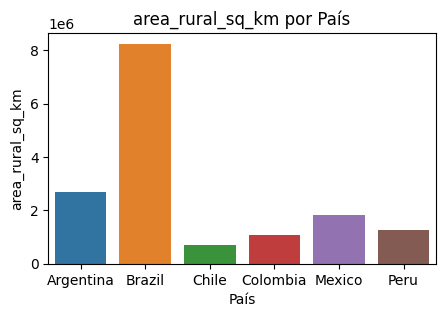

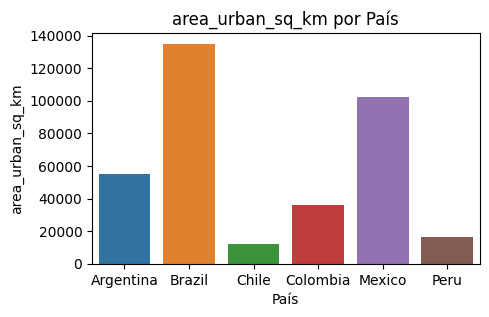

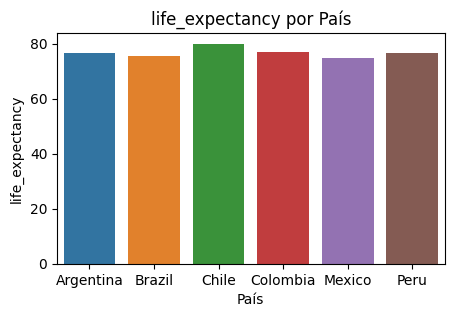

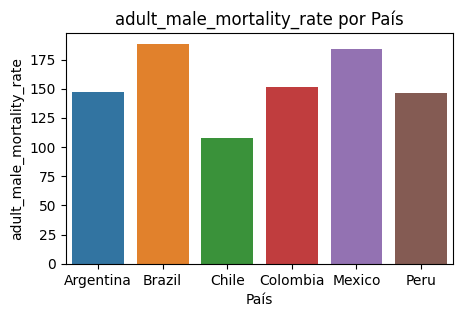

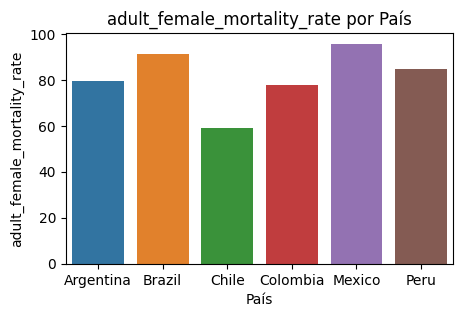

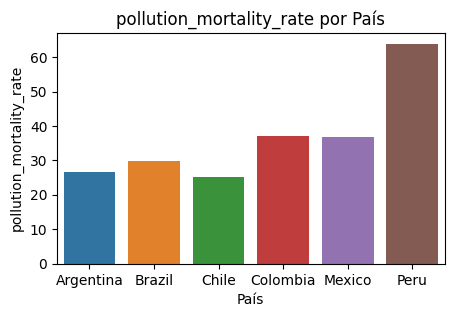

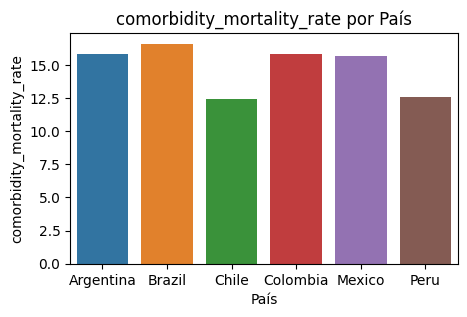

In [135]:
for i in data_latam_filtrada.columns:
    if i not in ["location_key","date","country_code","country_name","latitude","longitude","cumulative_confirmed","cumulative_deceased","cumulative_recovered","cumulative_vaccine_doses_administered","new_recovered"]:
        fig,ax=plt.subplots(figsize=(5,3))
        sns.barplot(x="country_name",y=i,data=data_latam_filtrada,ax=ax,hue="country_name")
        plt.title(f"{i} por País")
        plt.xlabel('País')
        plt.ylabel(f'{i}')
        plt.show()

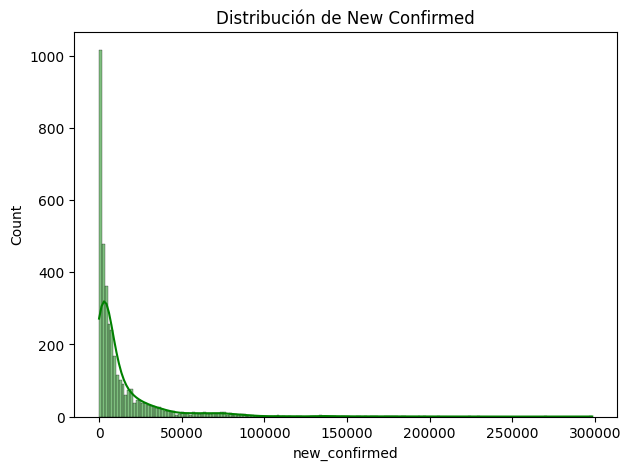

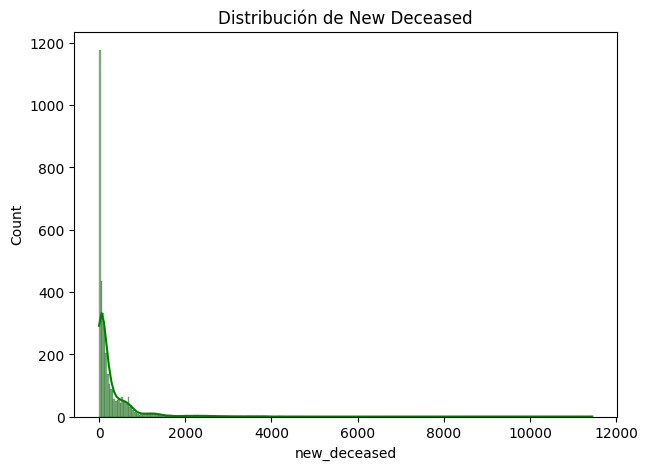

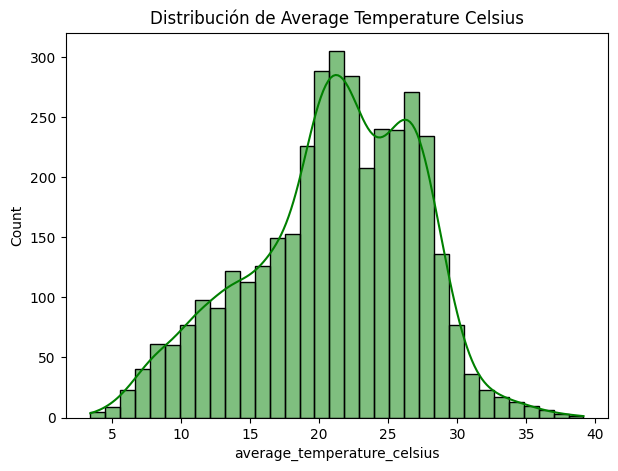

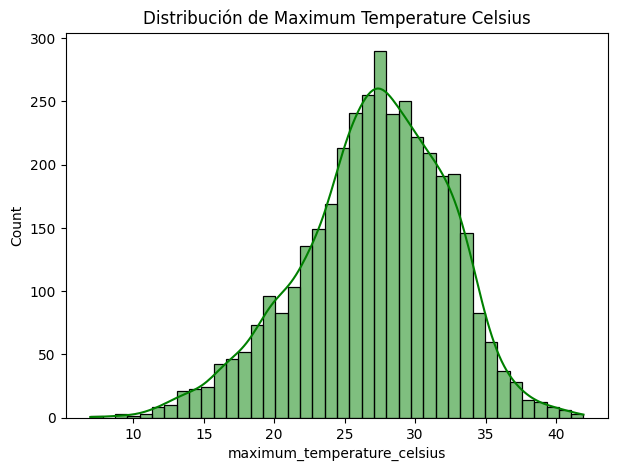

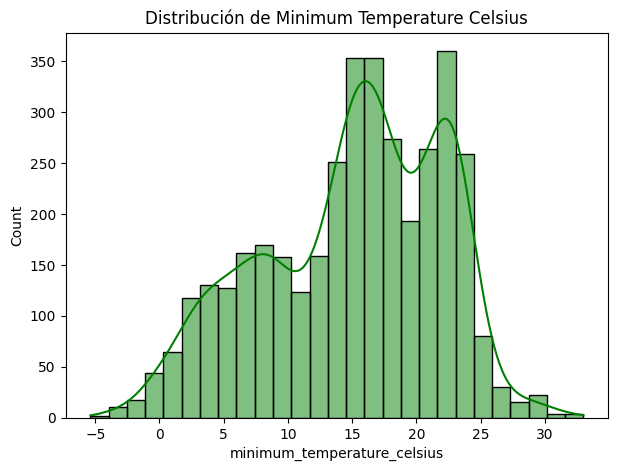

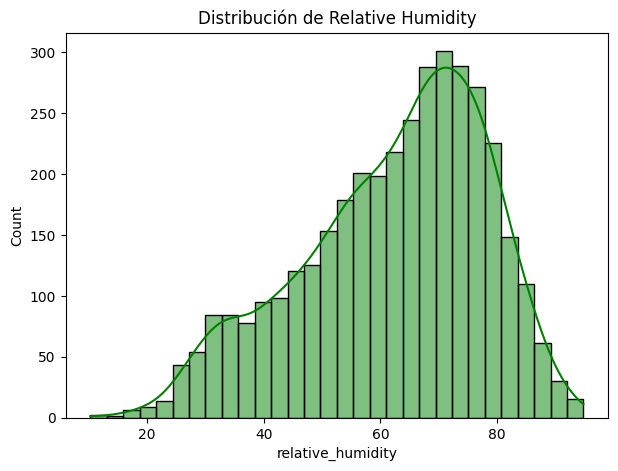

In [140]:
#Lista de columnas para crear Histogramas
lista_columnas=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased","cumulative_vaccine_doses_administered",
"average_temperature_celsius","maximum_temperature_celsius","minimum_temperature_celsius","relative_humidity"]
#Crear histogramas de variables numéricas
for i in data_latam_filtrada[lista_columnas]:
    if i not in ["location_key","date","country_code","country_name","latitude","longitude","cumulative_confirmed","cumulative_deceased",
    "cumulative_recovered","cumulative_vaccine_doses_administered","new_recovered"]:
        fig,ax=plt.subplots(figsize=(7,5))
        sns.histplot(data_latam_filtrada [i],kde=True,color='green')
        plt.title(f"Distribución de {i.replace('_', ' ').title()}")
        plt.show()

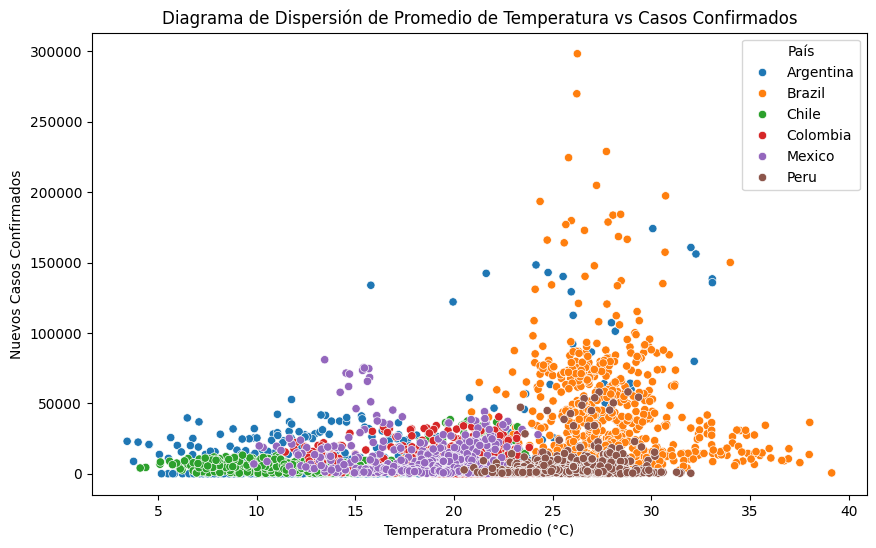

In [143]:
#Diagrama dispersión Temperatura promedio vs casos confirmados
fig,ax=plt .subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y="new_confirmed",data=data_latam_filtrada,hue="country_name")
plt.title("Diagrama de Dispersión de Promedio de Temperatura vs Casos Confirmados")
plt.xlabel("Temperatura Promedio (°C)")
plt.ylabel("Nuevos Casos Confirmados")
plt.legend(title='País')
plt.show()

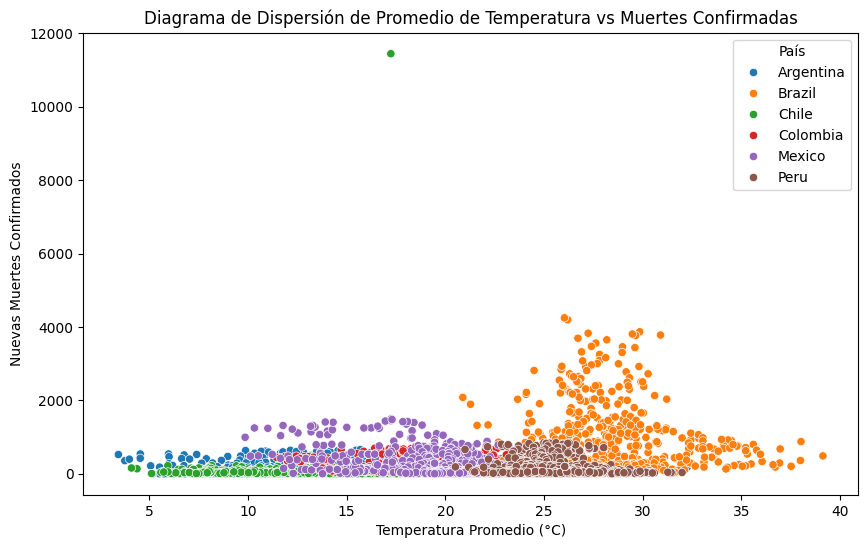

In [144]:
#Diagrama dispersión Temperatura promedio vs muertes confirmadas
fig,ax=plt .subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y="new_deceased",data=data_latam_filtrada,hue="country_name")
plt.title("Diagrama de Dispersión de Promedio de Temperatura vs Muertes Confirmadas")
plt.xlabel("Temperatura Promedio (°C)")
plt.ylabel("Nuevas Muertes Confirmados")
plt.legend(title='País')
plt.show()

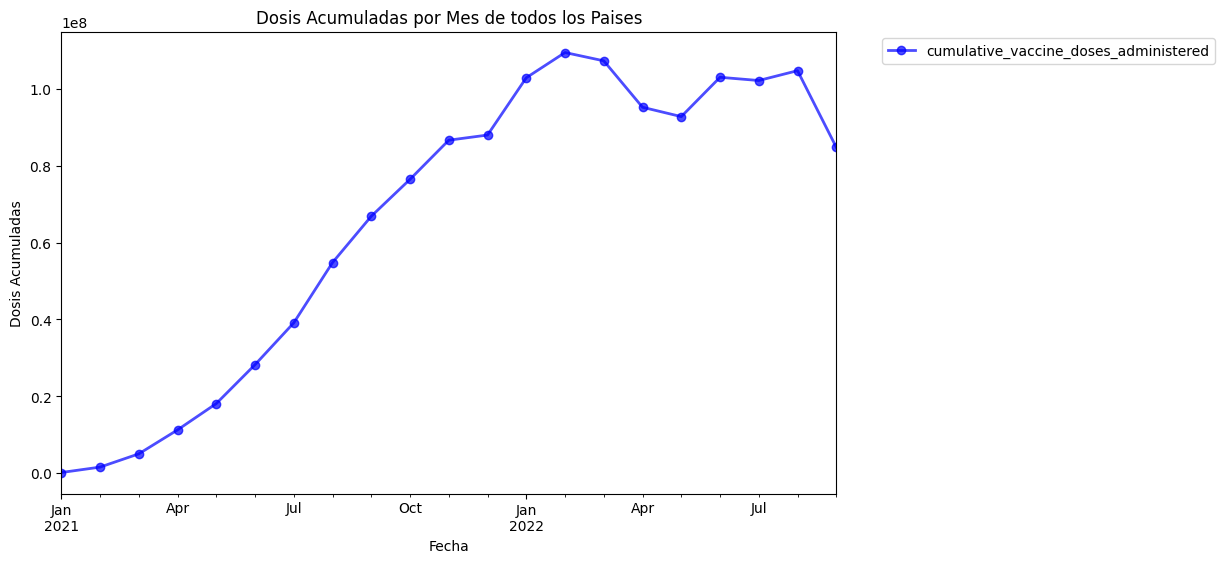

In [183]:
#Grafico de Comportamiento de las dosis administradas de todos los países 
fig,ax=plt .subplots(figsize=(10,6))
data_latam_filtrada . resample ('ME').mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot(ax=ax, 
    color='blue',          # Color de la línea
    linestyle='-',         # Estilo de línea
    linewidth=2,           # Grosor de la línea
    alpha=0.7,             # Transparencia de la línea
    marker='o',            # Marcador para los puntos
    markersize=6           # Tamaño del marcador
)
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.title("Dosis Acumuladas por Mes de todos los Paises")
plt.xlabel("Fecha")
plt.ylabel("Dosis Acumuladas")
plt.show()

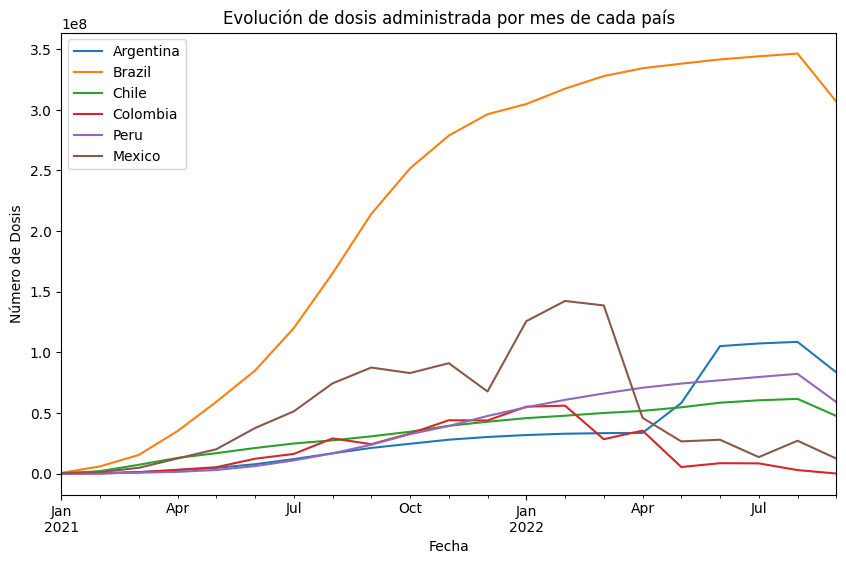

In [186]:
#Grafico de Comportamiento de las dosis administradas de todos los países 
fig,ax=plt .subplots(figsize=(10,6))
for pais in pais_seleccionado:
    data_latam_filtrada[data_latam_filtrada["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
plt.title("Evolución de dosis administrada por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(pais_seleccionado)
plt.xlabel("Fecha")
plt.ylabel("Número de Dosis")
plt.show()

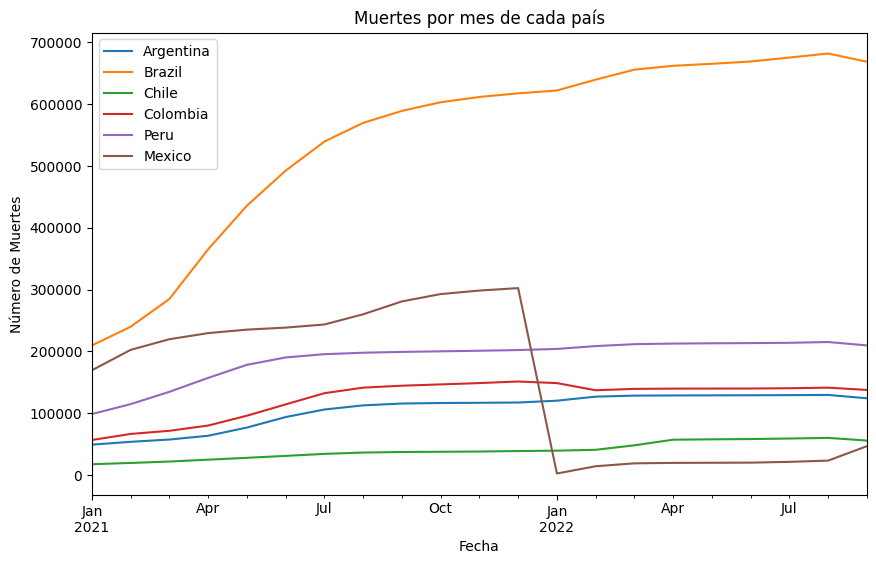

In [187]:
#Grafico de muertes por mes de cada pais
fig,ax=plt .subplots(figsize=(10,6))
for pais in pais_seleccionado:
    data_latam_filtrada[data_latam_filtrada["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_deceased"].plot()
plt.title("Muertes por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(pais_seleccionado)
plt.xlabel("Fecha")
plt.ylabel("Número de Muertes")
plt.show()

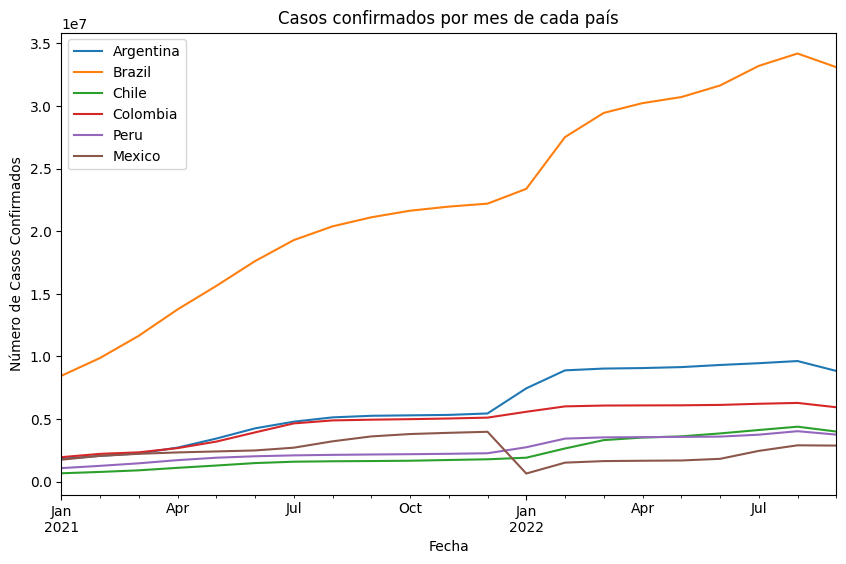

In [188]:
#Grafico de casos confirmados por mes
fig,ax=plt .subplots(figsize=(10,6))
for pais in pais_seleccionado:
    data_latam_filtrada[data_latam_filtrada["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_confirmed"].plot()
plt.title("Casos confirmados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(pais_seleccionado)
plt.xlabel("Fecha")
plt.ylabel("Número de Casos Confirmados")
plt.show()

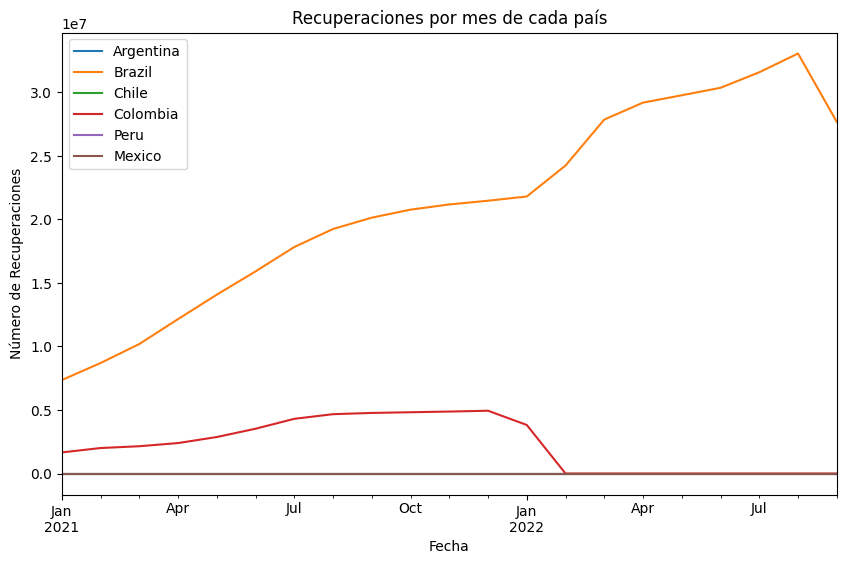

In [189]:
#Grafico Recuperaciones de casos por mes de cada país.
fig,ax=plt .subplots(figsize=(10,6))
for pais in pais_seleccionado:
    data_latam_filtrada[data_latam_filtrada["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_recovered"].plot()
plt.title("Recuperaciones por mes de cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(pais_seleccionado)
plt.xlabel("Fecha")
plt.ylabel("Número de Recuperaciones")
plt.show()

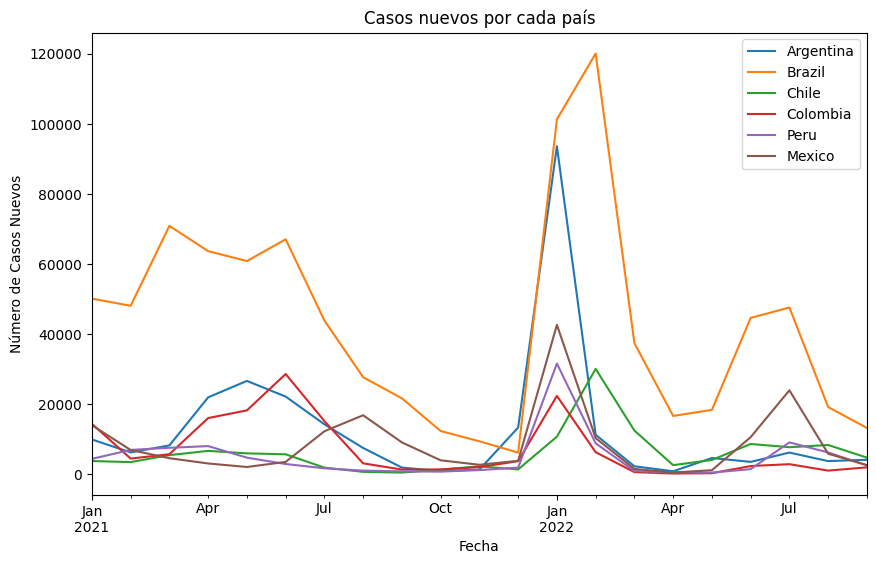

In [190]:
#Grafico Comparación del Número de Casos Nuevos entre Países.
fig,ax=plt .subplots(figsize=(10,6))
for pais in pais_seleccionado:
    data_latam_filtrada[data_latam_filtrada["country_name"]==pais].resample("ME").mean(numeric_only=True)["new_confirmed"].plot()
plt.title("Casos nuevos por cada país")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.legend(pais_seleccionado)
plt.xlabel("Fecha")
plt.ylabel("Número de Casos Nuevos")
plt.show()

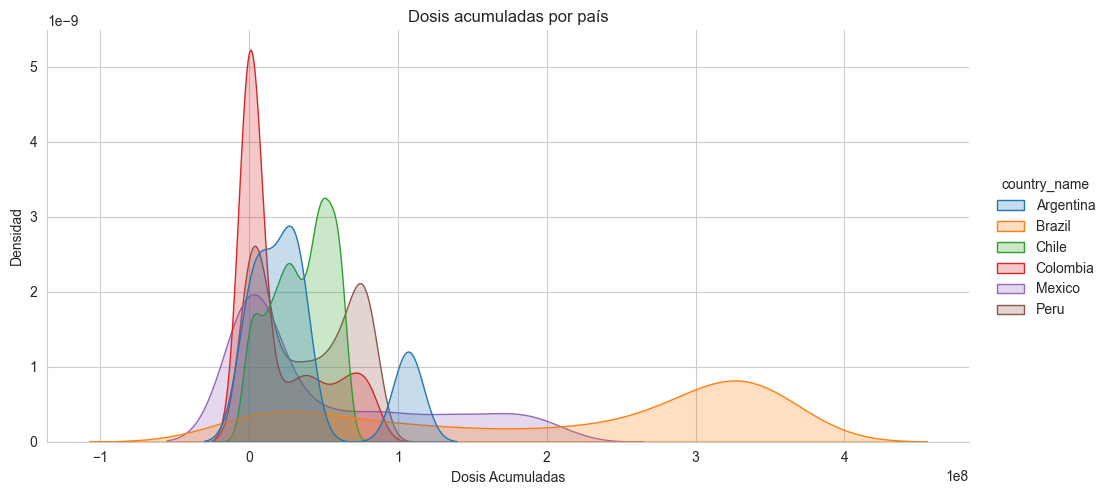

In [193]:
#Grafico Dosis acumuladas por pais
sns.set_style("whitegrid")
sns.displot(data_latam_filtrada,x="cumulative_vaccine_doses_administered",hue="country_name",kind="kde",fill=True, aspect=2)
plt.title("Dosis acumuladas por país")
plt.xlabel("Dosis Acumuladas")
plt.ylabel("Densidad")
plt.show()

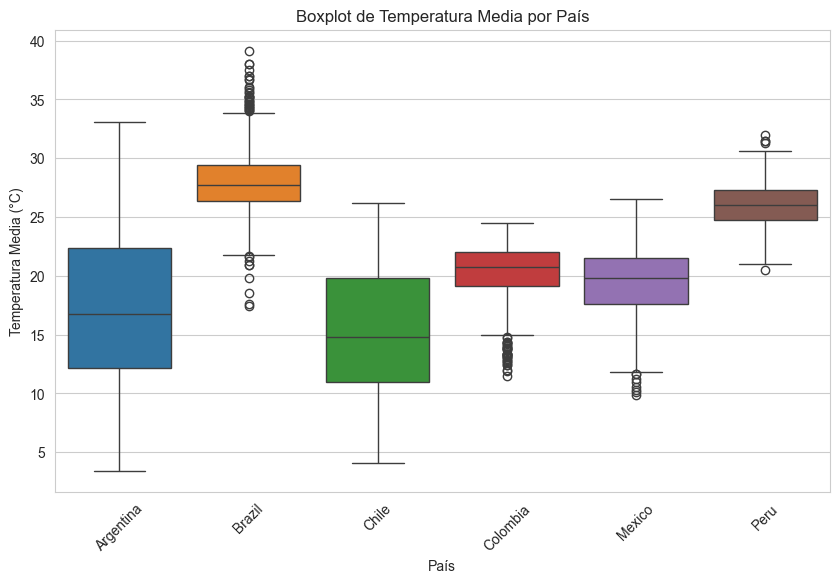

In [195]:
#Grafico temperatura media de cada pais
# Personalizar el estilo
sns.set_style("whitegrid")
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="country_name", y="average_temperature_celsius", data=data_latam_filtrada,hue="country_name")
# Añadir título y etiquetas de los ejes
plt.title("Boxplot de Temperatura Media por País")
plt.xlabel("País")
plt.ylabel("Temperatura Media (°C)")
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

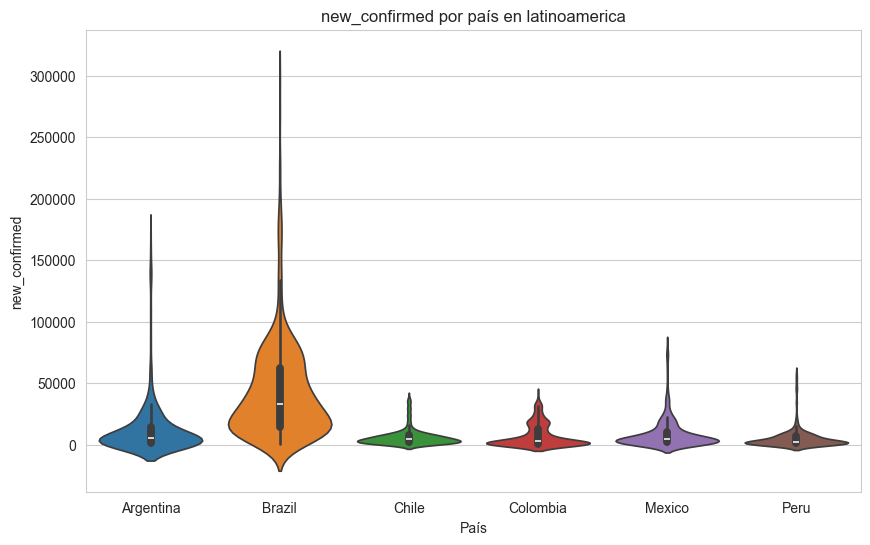

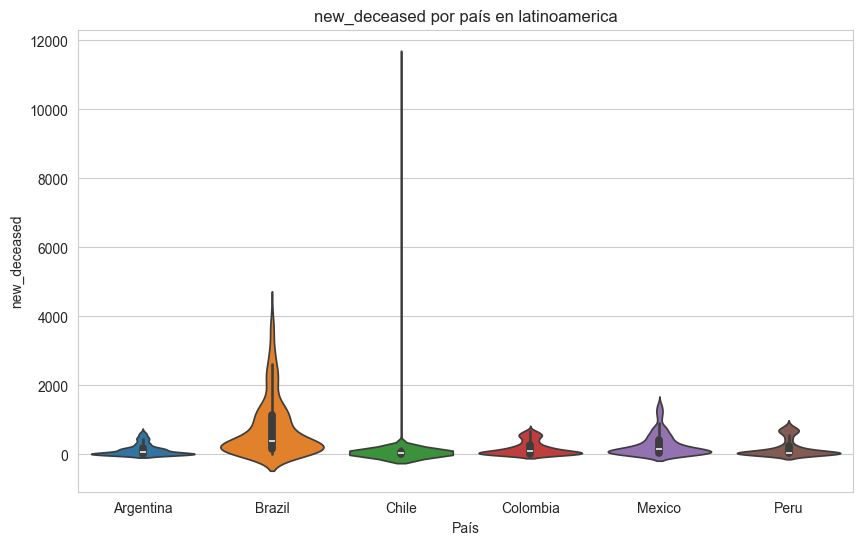

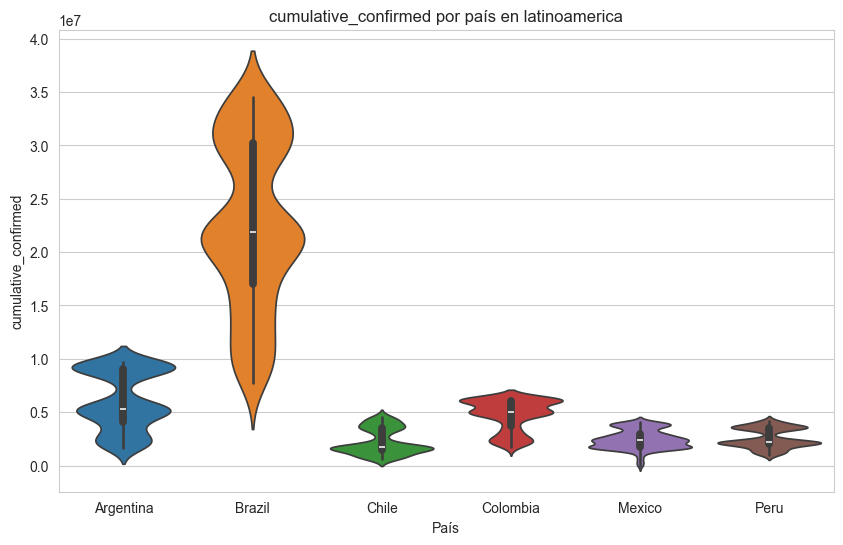

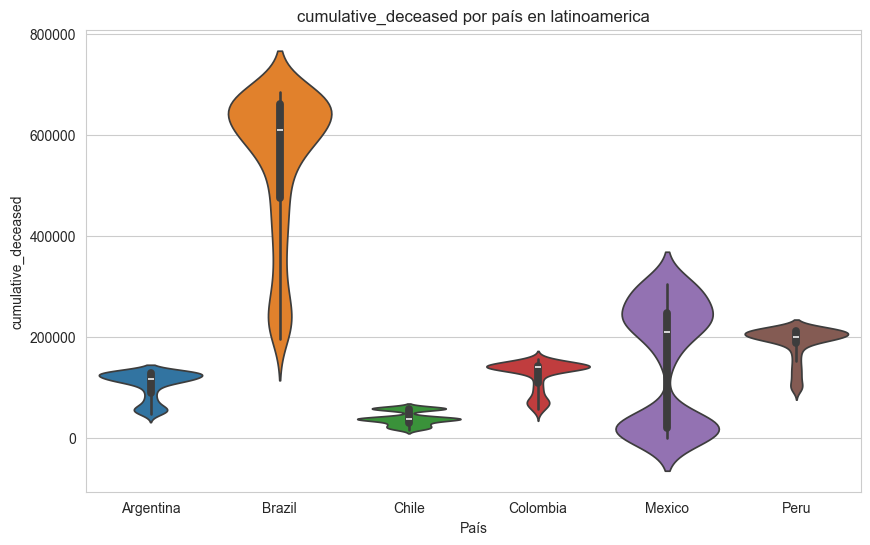

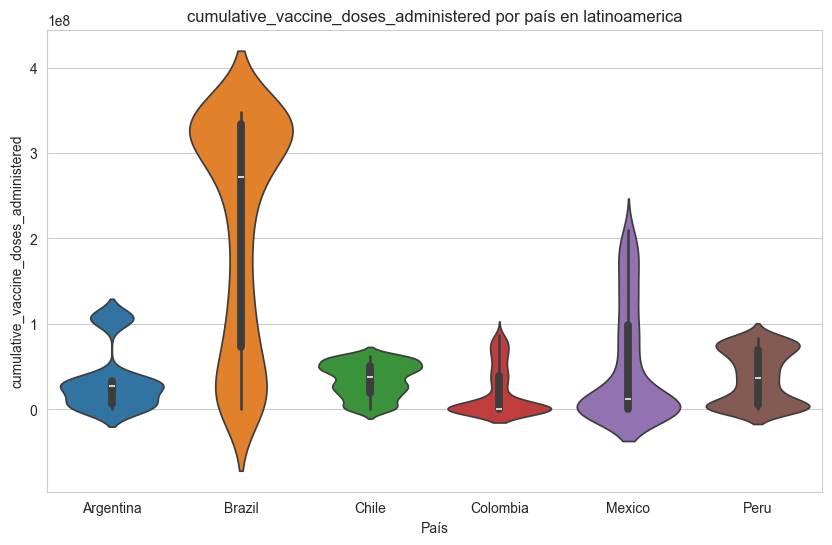

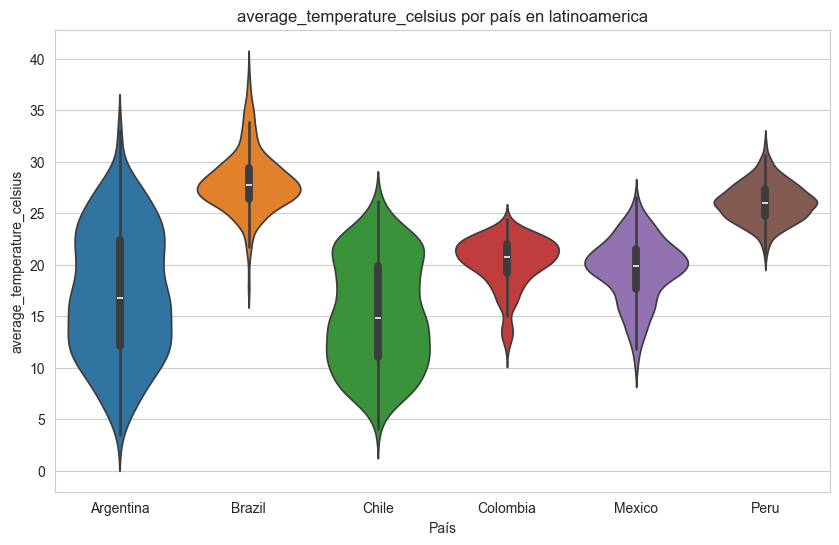

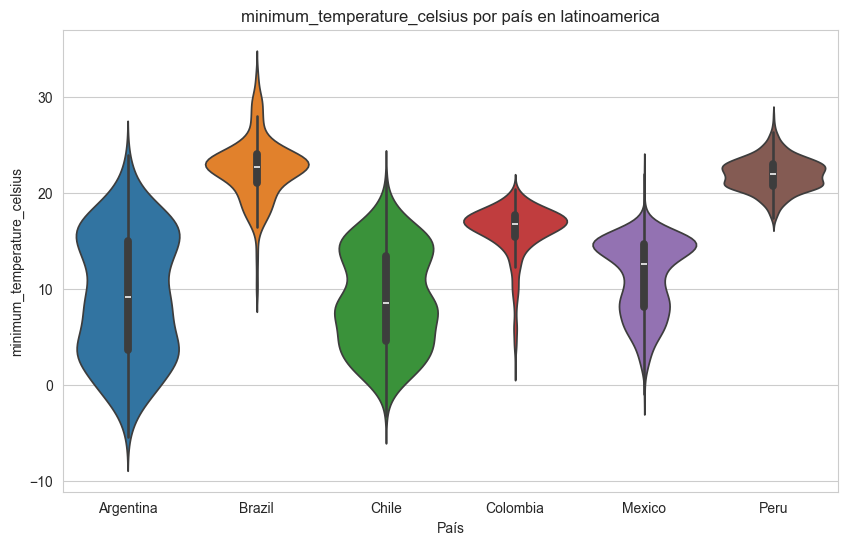

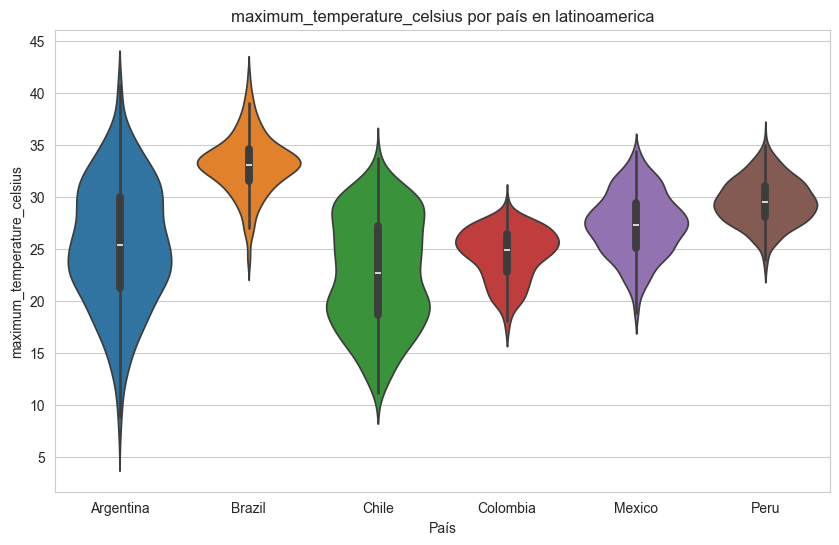

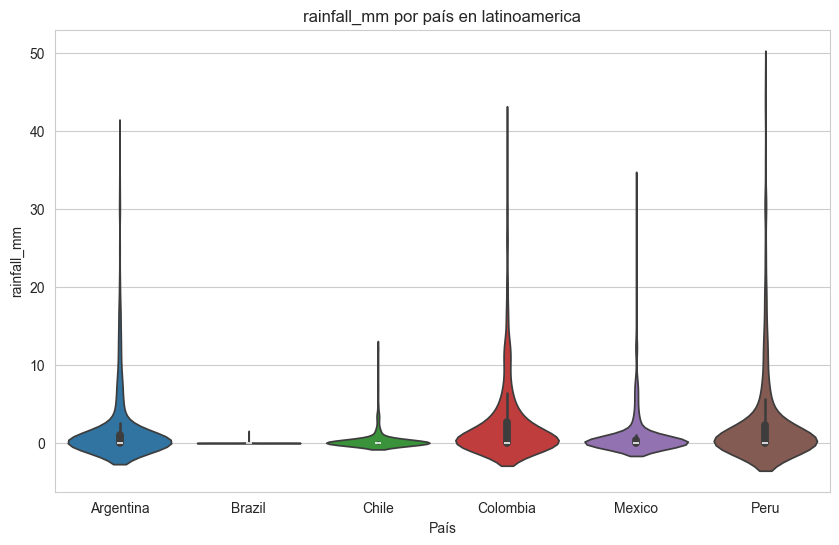

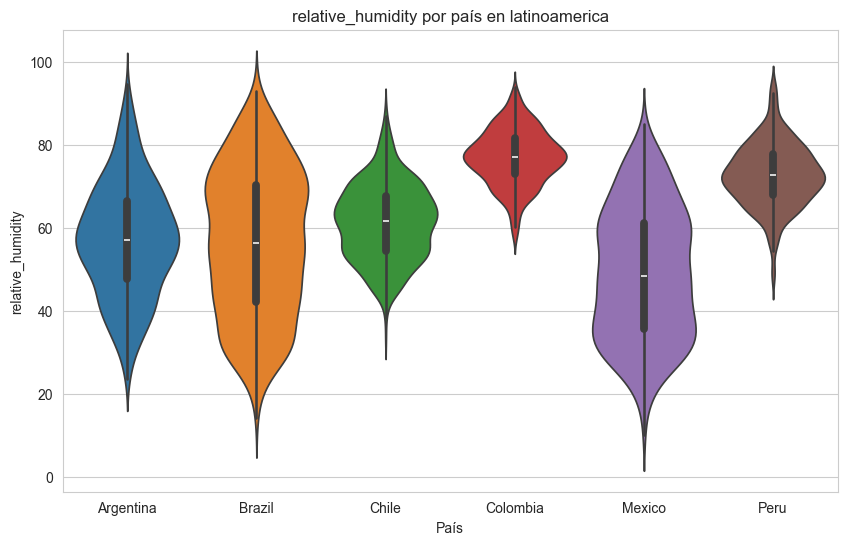

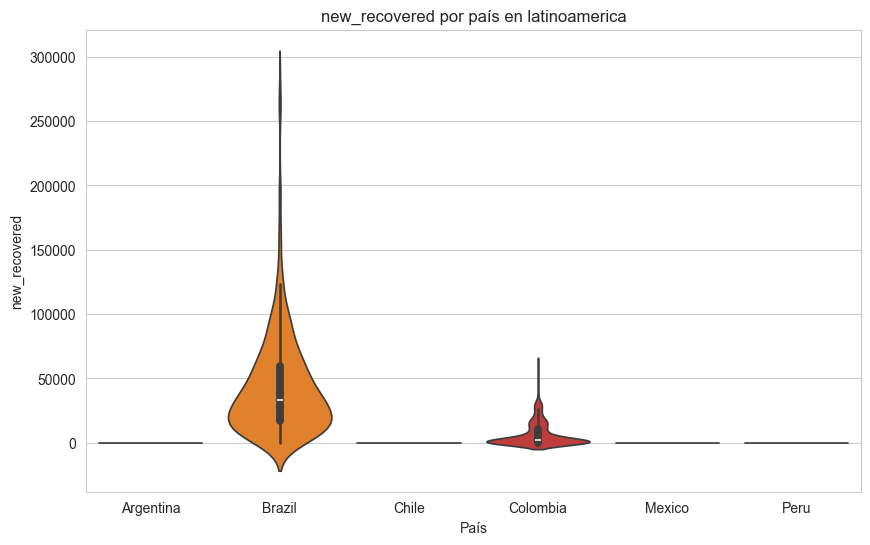

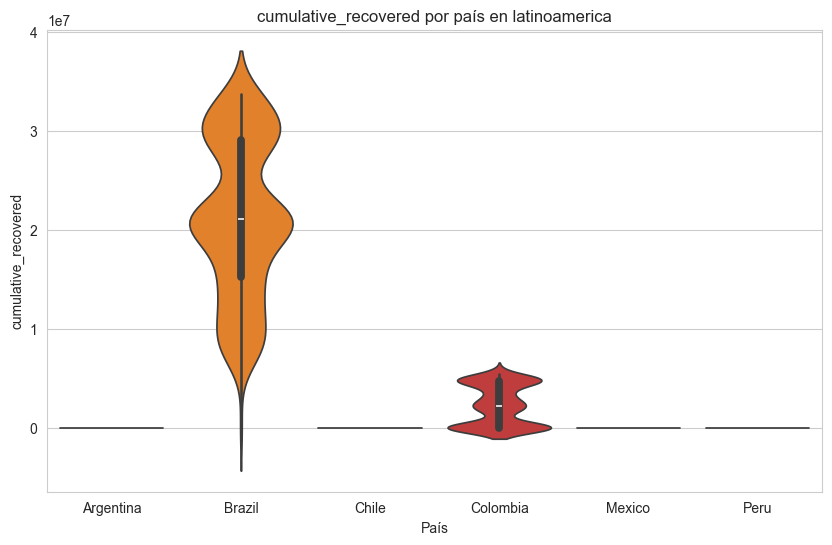

In [197]:
#Grafico Violin de Variables que tienen cambio de valores
columnas_mayores=[]
for i in data_latam_filtrada.columns:
    if i not in ["location_key","date","country_code","latitude","logitude"]:
        if data_latam_filtrada[i].nunique()>6:
            columnas_mayores.append(i)

columnas_mayores.append("country_name")

data_latam_paises_mayores=data_latam_filtrada[columnas_mayores]

for i in data_latam_paises_mayores.columns:
    if i not in ["location_key","date","country_code","latitude","logitude","country_name"]:
        fig, ax= plt. subplots (figsize=(10,6))
        sns. violinplot(x="country_name",y=i,data=data_latam_paises_mayores,hue="country_name")
        plt.title (f"{i} por país en latinoamerica")
        plt.xlabel("País")
        plt.show

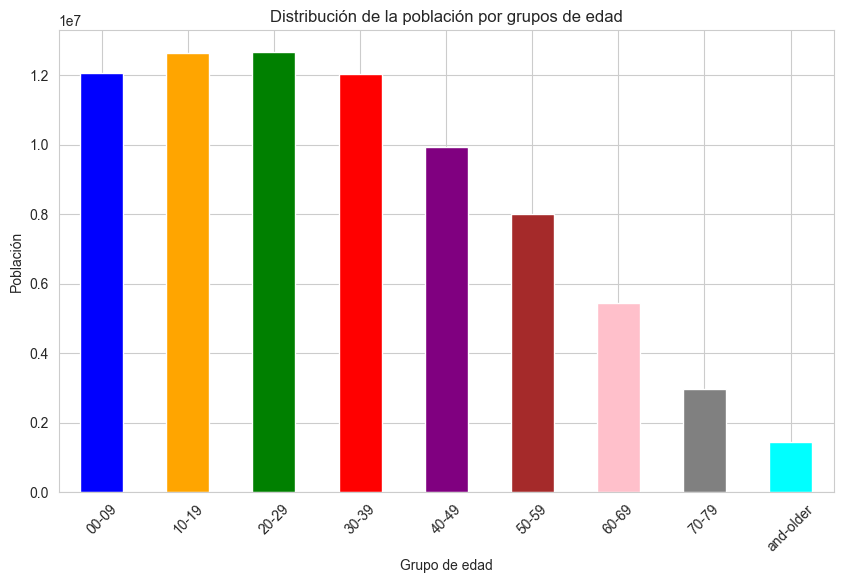

In [207]:
#Grafico Distribución de la poblacion por grupos de edad
age_columns=["population_age_00_09","population_age_10_19","population_age_20_29","population_age_30_39","population_age_40_49","population_age_50_59","population_age_60_69","population_age_70_79","population_age_80_and_older"]
age_distribution=data_latam_filtrada[age_columns].mean()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan']
plt.figure(figsize=(10, 6))
age_distribution.plot(kind="bar",stacked=True,color=colors)
# Añadir título y etiquetas de los ejes
plt.title("Distribución de la población por grupos de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Población")
plt.xticks(range(len(age_columns)),[col.split('_')[-2] + '-'+ col.split('_')[-1] for col in age_columns], rotation=45)
plt.show()

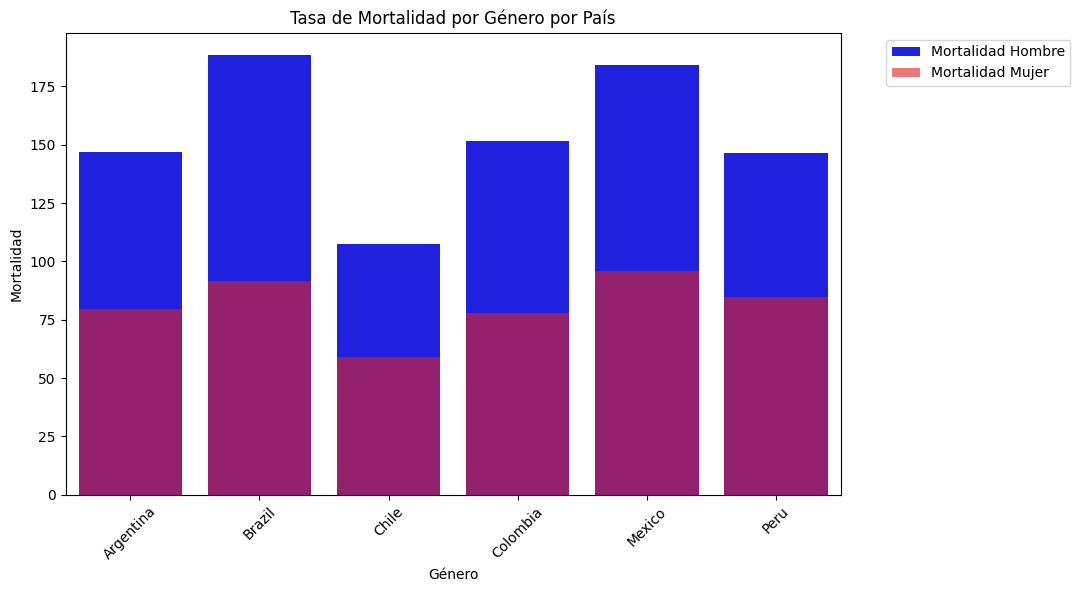

In [10]:
#Grafico de Mortalidad por Genero
plt.figure(figsize=(10,6))
sns.barplot(data=data_latam_filtrada,x="country_name",y="adult_male_mortality_rate",color="blue",label="Mortalidad Hombre")
sns.barplot(data=data_latam_filtrada,x="country_name",y="adult_female_mortality_rate",color="red",alpha=0.6,label="Mortalidad Mujer")
plt.xticks(rotation=45)
plt.xlabel("Género")
plt.ylabel("Mortalidad")
plt.title("Tasa de Mortalidad por Género por País")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left")
plt.show ()


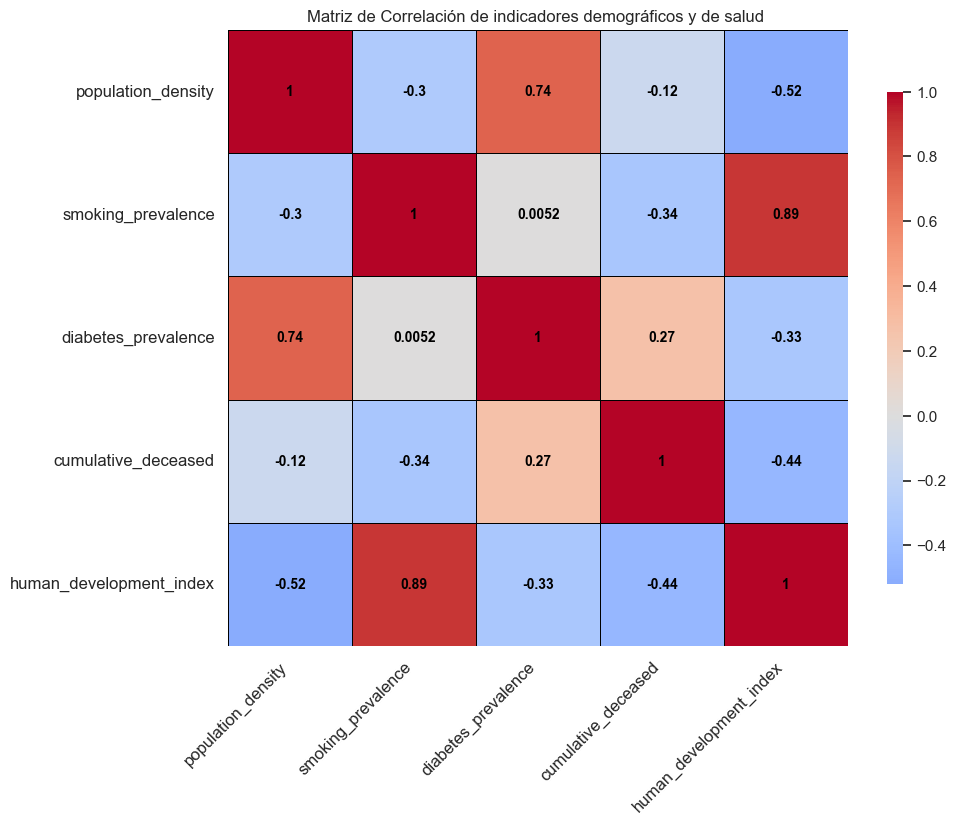

In [16]:
#Matriz de correlación de indicadores demográficos y de salud.
columns=["population_density","smoking_prevalence","diabetes_prevalence","cumulative_deceased","human_development_index"]
correlation_matrix=data_latam_filtrada[columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",center=0,linewidths=0.5, 
    linecolor='black', 
    cbar_kws={'shrink': 0.8, 'aspect': 30},
    annot_kws={"size": 10, "weight": "bold", "color": "black"})
plt.title("Matriz de Correlación de indicadores demográficos y de salud ")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show ()


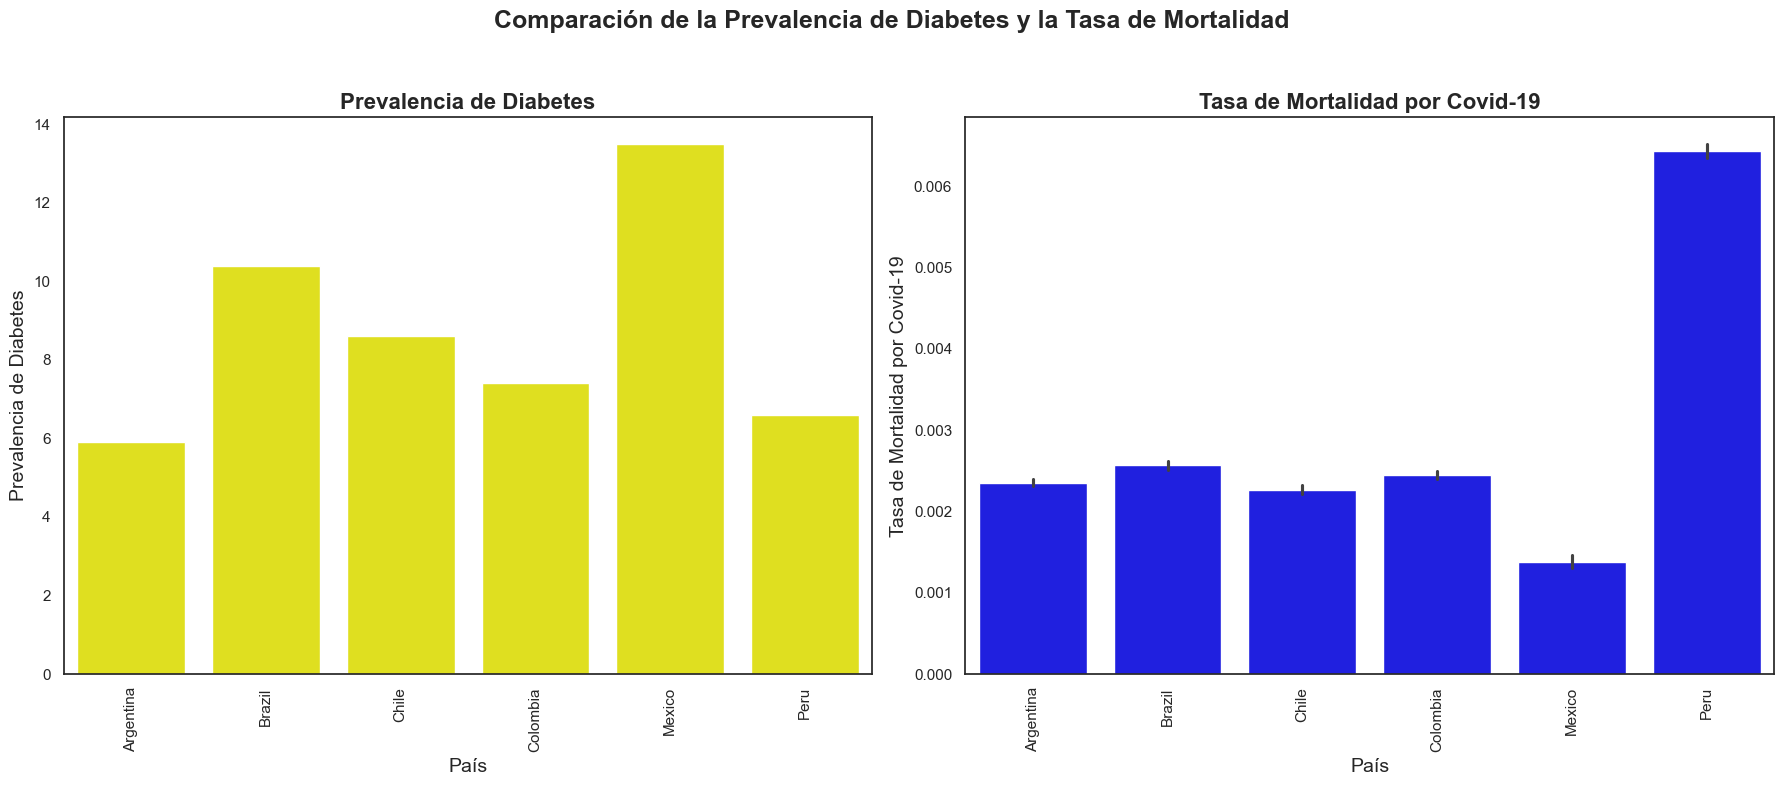

In [28]:
#Grafico Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
# Gráfico de Prevalencia de Diabetes
sns.barplot(data=data_latam_filtrada, x="country_name", y="diabetes_prevalence", color="yellow", ax=ax1)
ax1.set_title("Prevalencia de Diabetes", fontsize=16, weight='bold')
ax1.set_xlabel("País", fontsize=14)
ax1.set_ylabel("Prevalencia de Diabetes", fontsize=14)
ax1.tick_params(axis='x', rotation=90)
# Gráfico de Tasa de Mortalidad por Covid-19
sns.barplot(data=data_latam_filtrada, x="country_name", y=data_latam_filtrada["cumulative_deceased"] / data_latam_filtrada["population"], color="blue", ax=ax2)
ax2.set_title("Tasa de Mortalidad por Covid-19", fontsize=16, weight='bold')
ax2.set_xlabel("País", fontsize=14)
ax2.set_ylabel("Tasa de Mortalidad por Covid-19", fontsize=14)
ax2.tick_params(axis='x', rotation=90)
plt.suptitle("Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### **AVANCE N°3** EDA

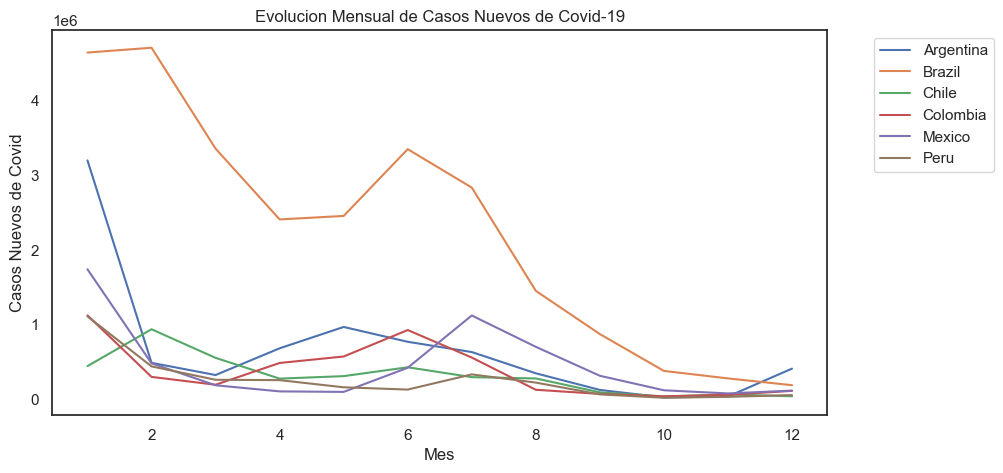

In [73]:
#Grafico de Evolución de Casos Activos Mensual
data_latam_filtrada["year"]=data_latam_filtrada.index.isocalendar().year
data_latam_filtrada["month"]=data_latam_filtrada.index.month
yearly_cases=data_latam_filtrada.groupby(["country_name","month"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(10,5))
for country in yearly_cases["country_name"].unique():
    country_yearly_cases=yearly_cases[yearly_cases["country_name"]==country]
    plt.plot(country_yearly_cases["month"],country_yearly_cases["new_confirmed"], label=country)
plt.xlabel ("Mes")
plt.ylabel ("Casos Nuevos de Covid")
plt.title ("Evolucion Mensual de Casos Nuevos de Covid-19")
plt.legend (bbox_to_anchor= (1.05,1),loc="upper left")
plt.show()

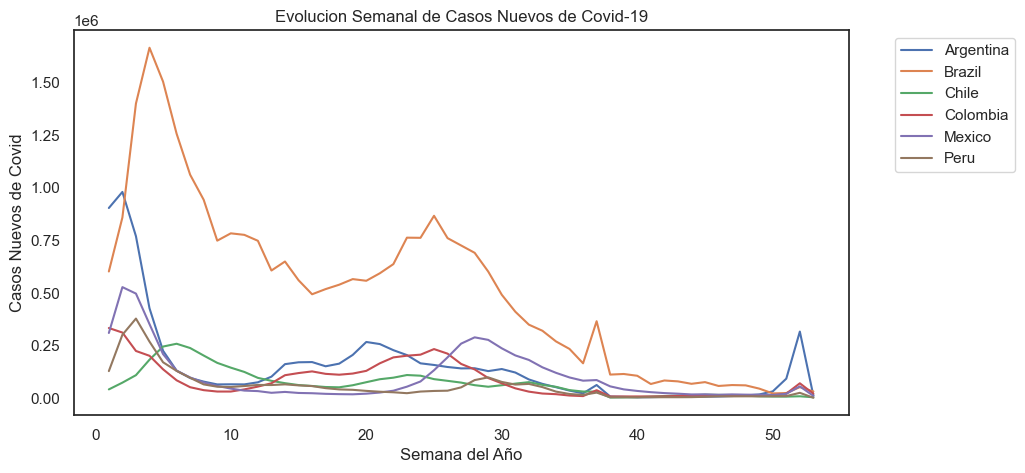

In [75]:
#Grafico de Evolución de Casos Activos Semanal
#Semanal
data_latam_filtrada["week"]=data_latam_filtrada.index.isocalendar().week
weekly_cases=data_latam_filtrada.groupby(["country_name","week"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(10,5))
for country in weekly_cases["country_name"].unique():
    country_weekly_cases=weekly_cases[weekly_cases["country_name"]==country]
    plt.plot(country_weekly_cases["week"],country_weekly_cases["new_confirmed"], label=country)
plt.xlabel ("Semana del Año")
plt.ylabel ("Casos Nuevos de Covid")
plt.title ("Evolucion Semanal de Casos Nuevos de Covid-19")
plt.legend (bbox_to_anchor= (1.05,1),loc="upper left")
plt.show()

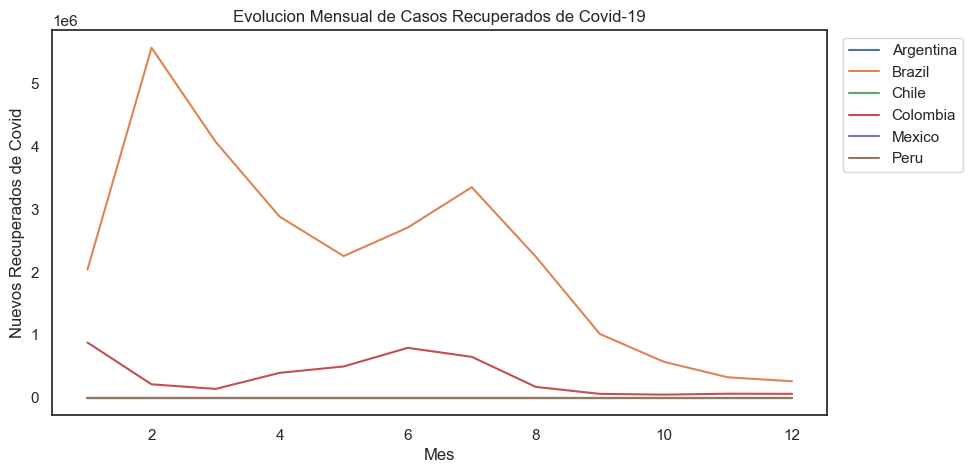

In [72]:
#Grafico de Evolución de Casos Recuperados
data_latam_filtrada["year"]=data_latam_filtrada.index.isocalendar().year

data_latam_filtrada["month"]=data_latam_filtrada.index.month

yearly_cases=data_latam_filtrada.groupby(["country_name","month"])["new_recovered"].sum().reset_index()
plt.figure(figsize=(10,5))
for country in yearly_cases["country_name"].unique():
    country_yearly_cases=yearly_cases[yearly_cases["country_name"]==country]
    plt.plot(country_yearly_cases["month"],country_yearly_cases["new_recovered"], label=country)
plt.xlabel ("Mes")
plt.ylabel ("Nuevos Recuperados de Covid")
plt.title ("Evolucion Mensual de Casos Recuperados de Covid-19")
plt.legend (bbox_to_anchor= (1.01,1),loc="upper left")
plt.show()


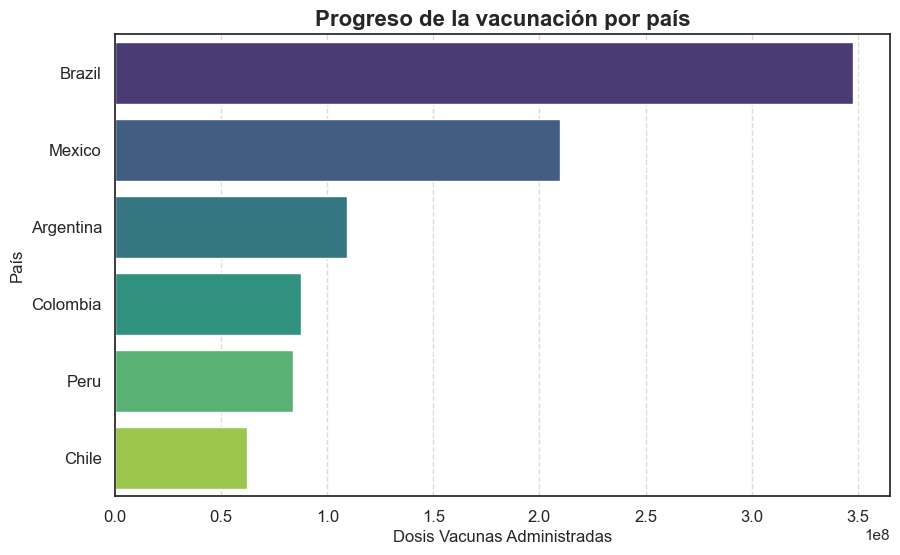

In [46]:
#Grafico Progreso de la vacunación por país
vaccination_date=data_latam_filtrada.groupby("country_name")["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=vaccination_date.values,y=vaccination_date.index,hue=vaccination_date.index,palette="viridis")
plt.xlabel("Dosis Vacunas Administradas")
plt.ylabel("País")
plt.title("Progreso de la vacunación por país",fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

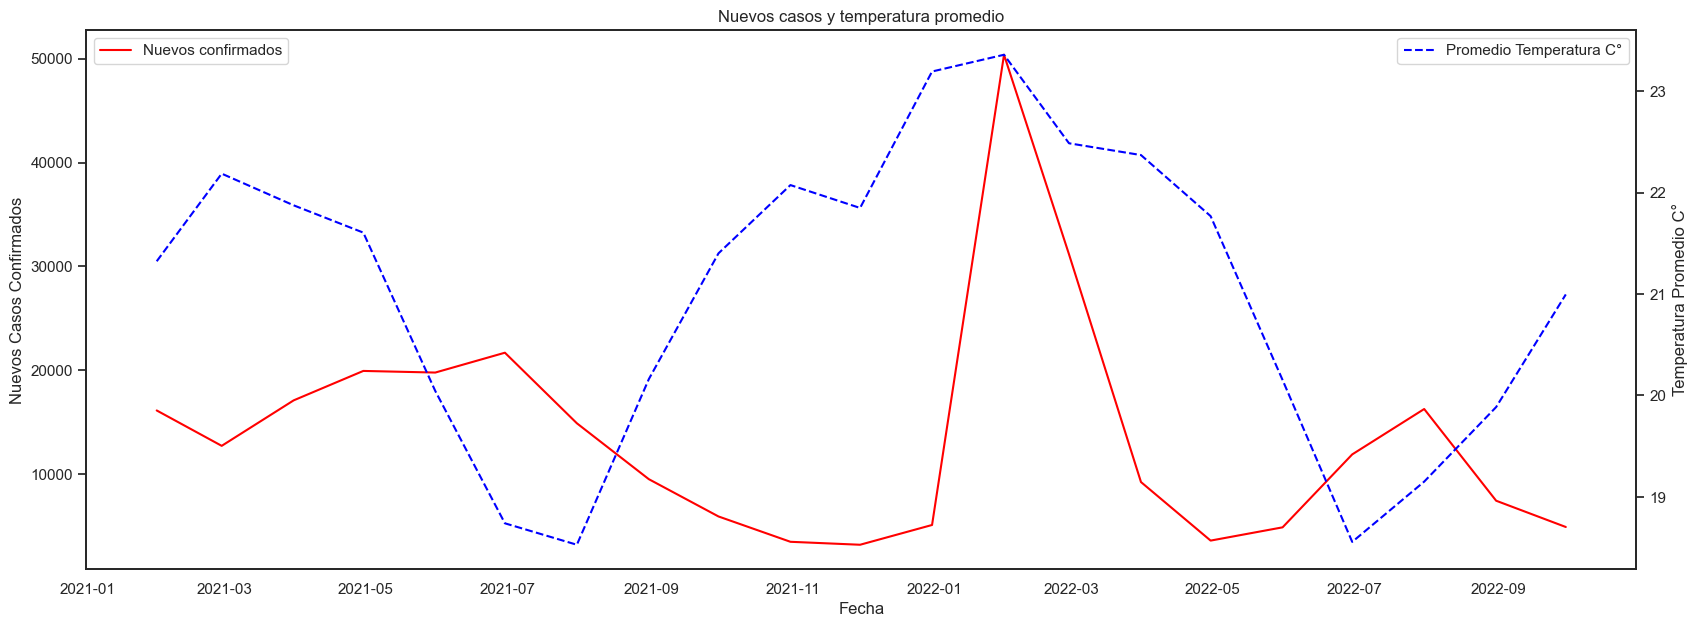

In [51]:
#Grafico -	Nuevos casos y temperatura promedio
plt.figure(figsize=(20,7))
ax1=plt.gca()
ax2=ax1.twinx()
ax1.plot(data_latam_filtrada.resample("ME").mean(numeric_only=True).index,data_latam_filtrada.resample("ME").mean(numeric_only=True)["new_confirmed"],color="red",label="Nuevos confirmados")
ax2.plot(data_latam_filtrada.resample("ME").mean(numeric_only=True).index,data_latam_filtrada.resample("ME").mean(numeric_only=True)["average_temperature_celsius"],color="blue",label="Promedio Temperatura C°",linestyle="--")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Nuevos Casos Confirmados")
ax2.set_ylabel("Temperatura Promedio C°")
plt.title("Nuevos casos y temperatura promedio")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9692\3867794119.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases["urban_population_percentage"],y=urban_cases.index,palette="viridis")


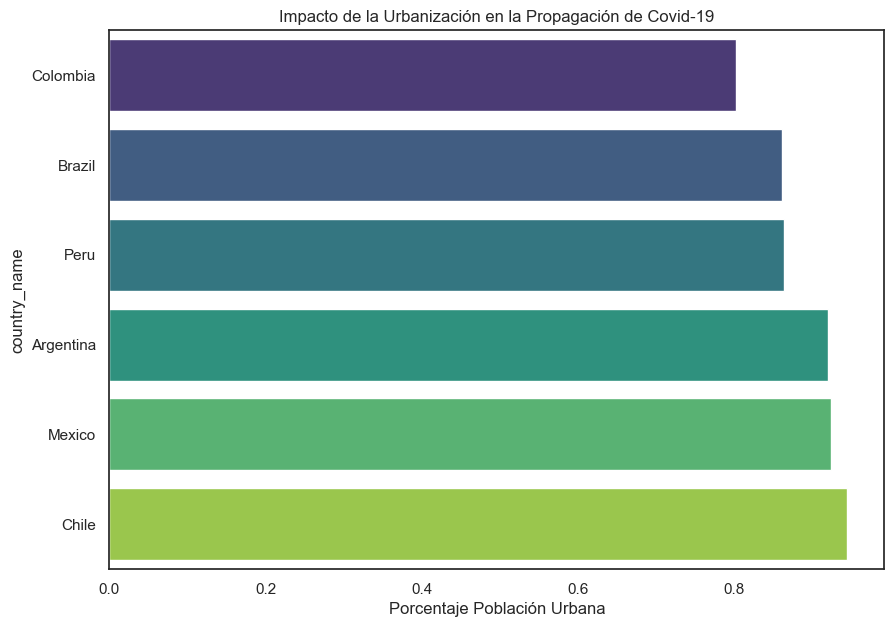

In [54]:
#Grafico -	Impacto de la Urbanización en la Propagación del Covid-19
data_latam_filtrada["urban_population_percentage"]=data_latam_filtrada["population_urban"]/data_latam_filtrada["population"]
urban_cases=data_latam_filtrada.groupby("country_name").last().sort_values(by="urban_population_percentage")

plt.figure(figsize=(10,7))
sns.barplot(x=urban_cases["urban_population_percentage"],y=urban_cases.index,palette="viridis")
plt.xlabel("Porcentaje Población Urbana")
plt.title("Impacto de la Urbanización en la Propagación de Covid-19")
plt.show()

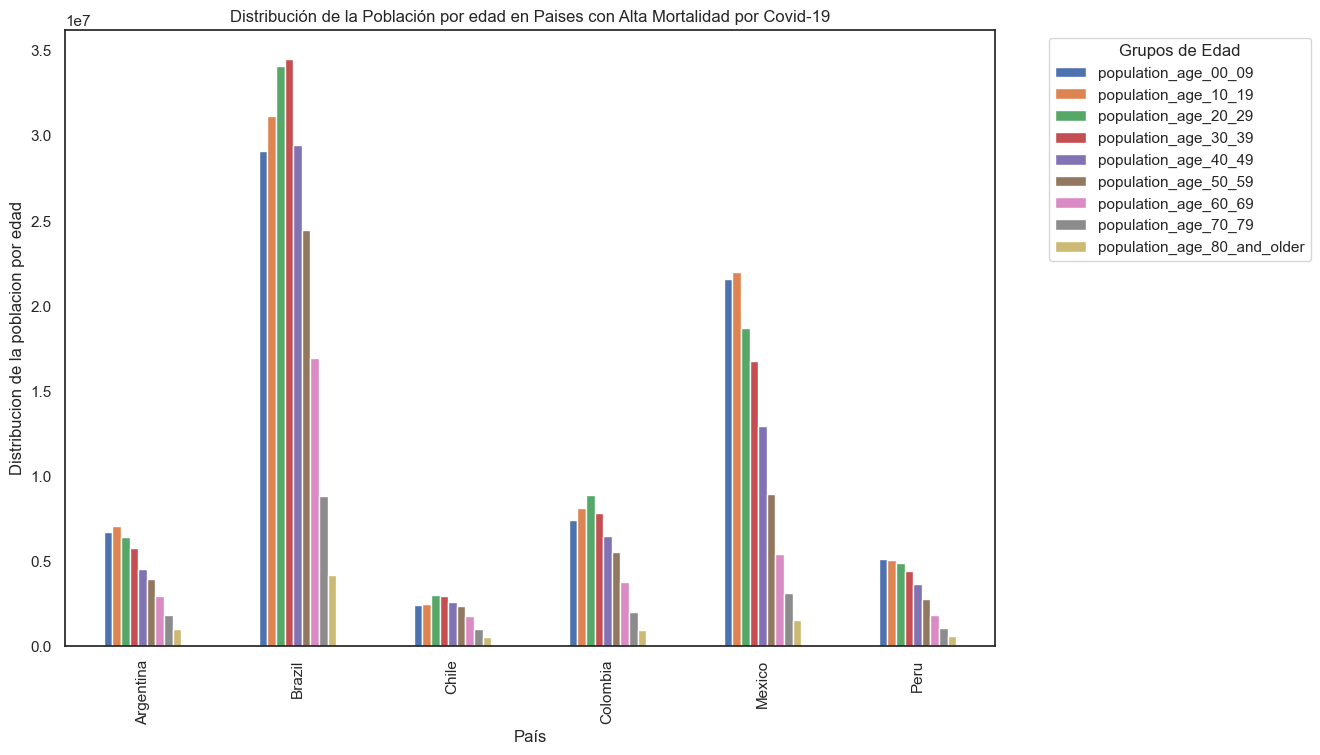

In [57]:
#Grafico Paises con Alta Mortalidad
high_mortality_countries=data_latam_filtrada.groupby("country_name")["cumulative_deceased"].max().sort_values(ascending=False).index
age_groups=["population_age_00_09","population_age_10_19","population_age_20_29","population_age_30_39","population_age_40_49","population_age_50_59","population_age_60_69","population_age_70_79","population_age_80_and_older"]
age_distribution = data_latam_filtrada[data_latam_filtrada["country_name"].isin(high_mortality_countries)].groupby("country_name")[age_groups].mean()

age_distribution.plot(kind="bar",stacked=False,figsize=(12,8))
plt.xlabel("País")
plt.ylabel("Distribucion de la poblacion por edad")
plt.title("Distribución de la Población por edad en Paises con Alta Mortalidad por Covid-19")
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",title="Grupos de Edad")
plt.show()


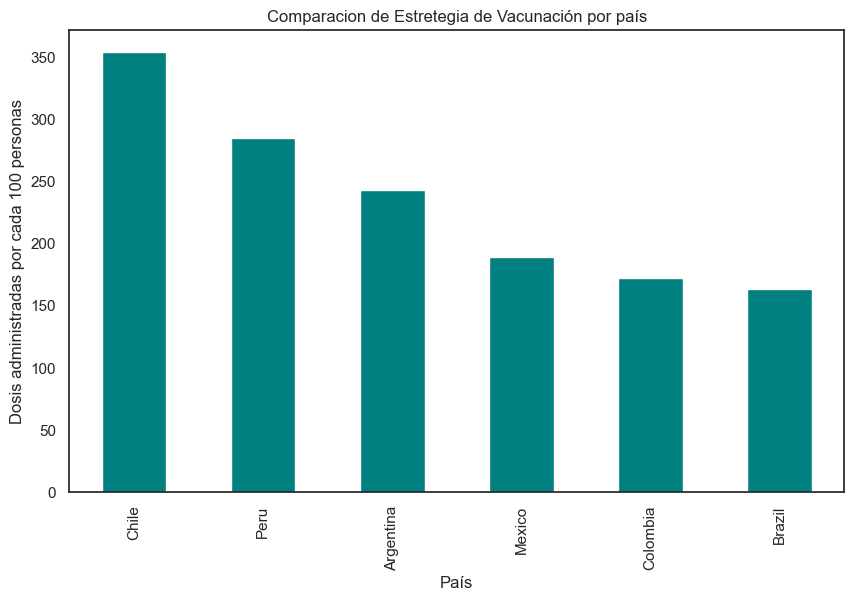

In [59]:
#Grafico de Estrategia de Vacunación por pais
vaccination_strategy=data_latam_filtrada.groupby("country_name")["cumulative_vaccine_doses_administered"].max()/data_latam_filtrada.groupby("country_name")["population"].max()*100
vaccination_strategy.sort_values(ascending=False).plot(kind="bar",figsize=(10,6),color="teal")
plt.xlabel("País")
plt.ylabel("Dosis administradas por cada 100 personas")
plt.title("Comparacion de Estretegia de Vacunación por país")
plt.show()

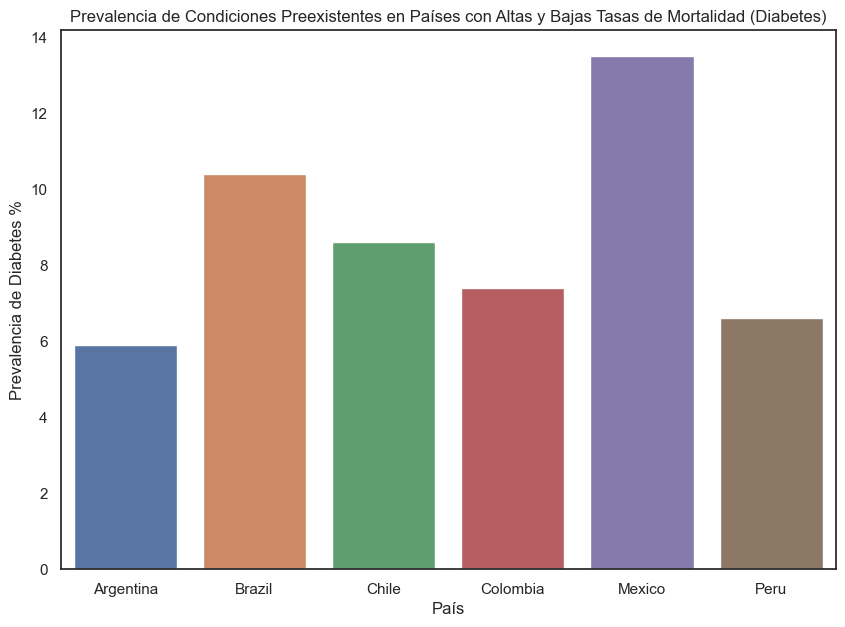

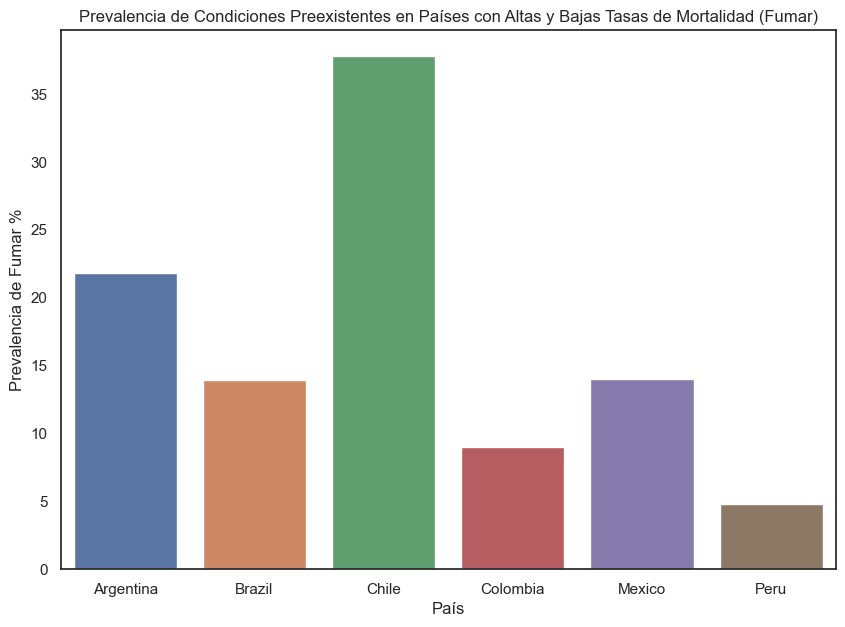

In [68]:
#Grafico -	Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
top_countries=data_latam_filtrada.groupby("country_name")["cumulative_deceased"].max().nlargest(5).index
bottom_countries=data_latam_filtrada.groupby("country_name")["cumulative_deceased"].max().nsmallest(5).index
conditions_date=data_latam_filtrada[data_latam_filtrada["country_name"].isin(top_countries.union(bottom_countries))]
plt.figure(figsize=(10,7))
sns.barplot(data=conditions_date,x="country_name",y="diabetes_prevalence",hue="country_name")
plt.xlabel("País")
plt.ylabel("Prevalencia de Diabetes %")
plt.title("Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad (Diabetes)")
plt.show()

plt.figure(figsize=(10,7))
sns.barplot(data=conditions_date,x="country_name",y="smoking_prevalence",hue="country_name")
plt.xlabel("País")
plt.ylabel("Prevalencia de Fumar %")
plt.title("Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad (Fumar)")
plt.show()

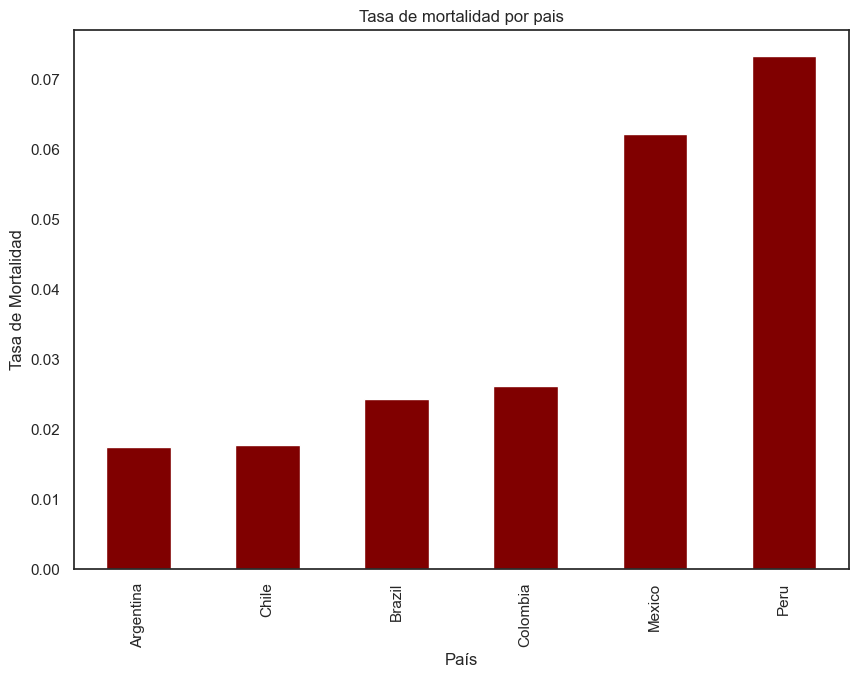

In [69]:
#Grafico Tasa de mortalidad por pais
data_latam_filtrada["case_fatality_rate"]=data_latam_filtrada["cumulative_deceased"]/data_latam_filtrada["cumulative_confirmed"]
fatality_rates=data_latam_filtrada.groupby("country_name")["case_fatality_rate"].last().sort_values()

plt.figure(figsize=(10,7))
bars=fatality_rates.plot(kind="bar",color="maroon")
plt.xlabel("País")
plt.ylabel("Tasa de Mortalidad")
plt.title("Tasa de mortalidad por pais")
plt.show()

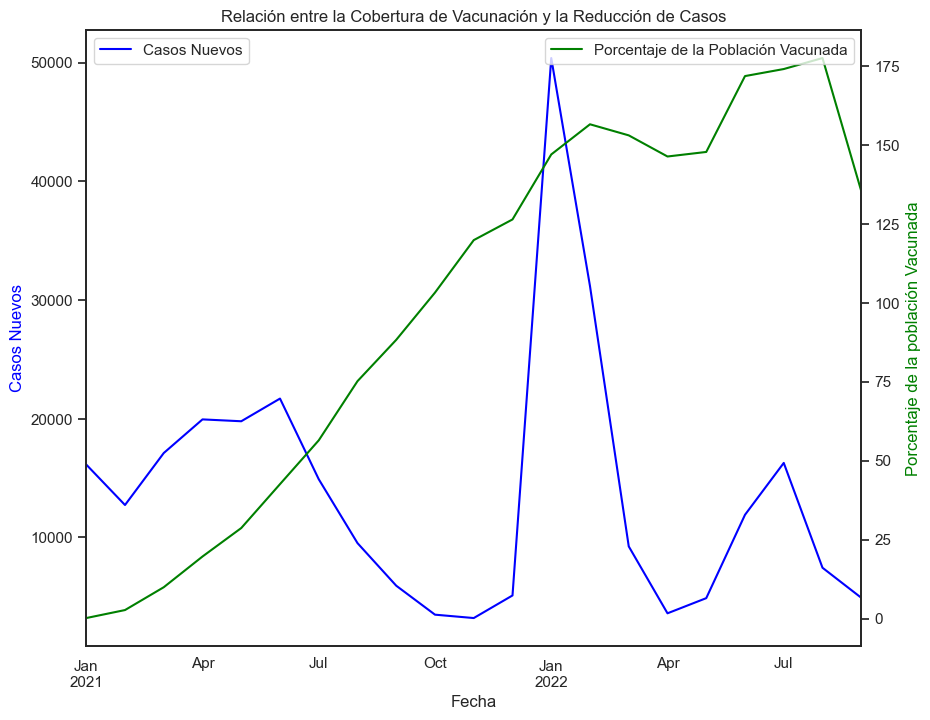

In [76]:
#Grafico de Relación entre la Cobertura de Vacunación y la Reducción de Casos
plt.figure(figsize=(10,8))
ax1=plt.gca()
ax2=ax1.twinx()

data_latam_filtrada["percentage_vaccinated"]=(data_latam_filtrada["cumulative_vaccine_doses_administered"]/data_latam_filtrada["population"])*100
data_latam_filtrada.resample("ME").mean(numeric_only=True)["new_confirmed"].plot(ax=ax1,color="blue",label="Casos Nuevos")
data_latam_filtrada.resample("ME").mean(numeric_only=True)["percentage_vaccinated"].plot(ax=ax2,color="green",label="Porcentaje de la Población Vacunada")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Nuevos",color="blue")
ax2.set_ylabel("Porcentaje de la población Vacunada",color="green")
ax1.set_title("Relación entre la Cobertura de Vacunación y la Reducción de Casos")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

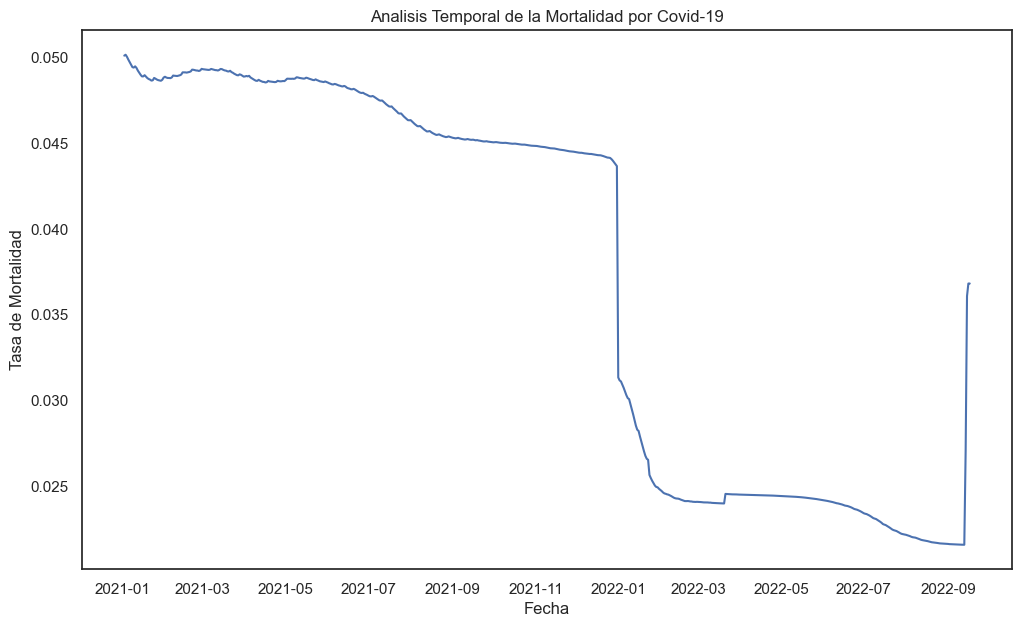

In [82]:
#Grafico Evolución de la Mortalidad
data_latam_filtrada["mortality_rate"]=data_latam_filtrada["cumulative_deceased"]/data_latam_filtrada["cumulative_confirmed"]

plt.figure(figsize=(12,7))
sns.lineplot(data=data_latam_filtrada,x="date",y="mortality_rate",estimator="mean",errorbar=None)
plt.title("Analisis Temporal de la Mortalidad por Covid-19")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Mortalidad")
plt.show()


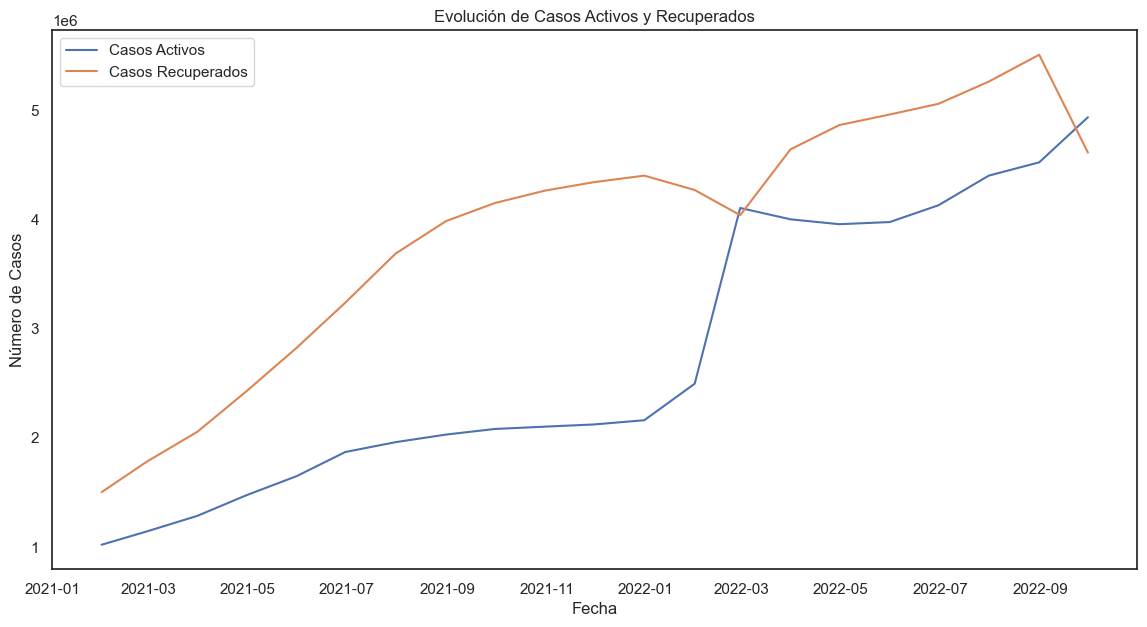

In [85]:
#Grafico Evolución de Casos Activos y Recuperados
data_latam_filtrada["active_cases"]= data_latam_filtrada["cumulative_confirmed"] - data_latam_filtrada["cumulative_deceased"] - data_latam_filtrada["cumulative_recovered"]
plt.figure(figsize=(14,7))
sns.lineplot(data=data_latam_filtrada.resample("ME").mean(numeric_only=True),x="date",y="active_cases",label="Casos Activos")
sns.lineplot(data=data_latam_filtrada.resample("ME").mean(numeric_only=True),x="date",y="cumulative_recovered",label="Casos Recuperados")
plt.xlabel("Fecha")
plt.ylabel("Número de Casos")
plt.title("Evolución de Casos Activos y Recuperados")
plt.legend()
plt.show()


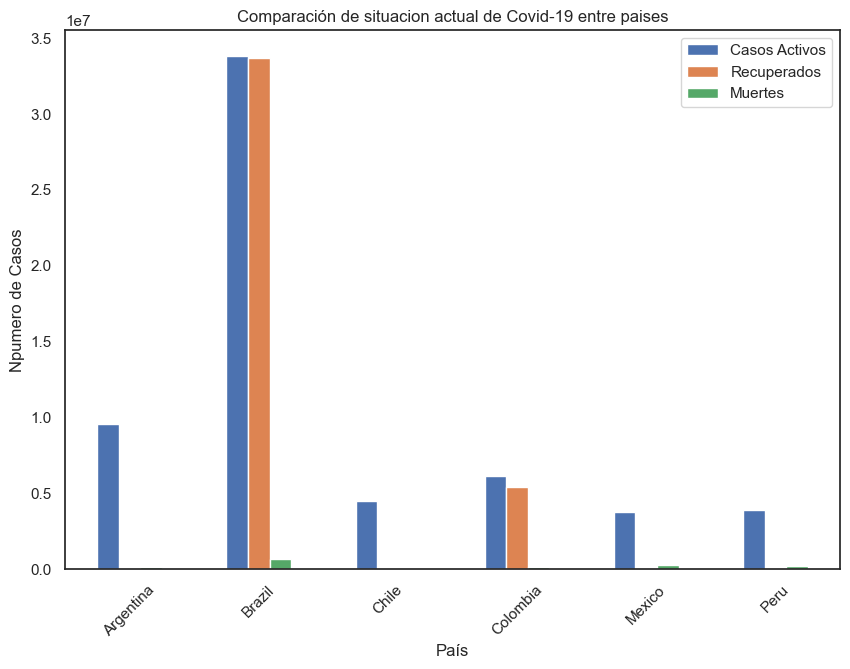

In [86]:
#Grafico Comparación de situacion actual de Covid-19 entre paises
current_situation=data_latam_filtrada.groupby("country_name").max()[["active_cases","cumulative_recovered","cumulative_deceased"]]
current_situation.plot(kind="bar",stacked=False,figsize=(10,7))
plt.title("Comparación de situacion actual de Covid-19 entre paises")
plt.xlabel("País")
plt.ylabel("Npumero de Casos")
plt.legend(["Casos Activos", "Recuperados", "Muertes"])
plt.xticks(rotation=45)
plt.show()

### **EXTRA CREDIT

In [13]:
import folium
from folium.plugins import HeatMap
# Crear un mapa centrado en una ubicación inicial
m = folium.Map(location=[0, 0], zoom_start=2)
# Obtener los datos de latitud y longitud
latitudes = data_latam_filtrada['latitude'].values
longitudes = data_latam_filtrada['longitude'].values
# Obtener los datos de casos confirmados, muertes y vacunas
confirmados = data_latam_filtrada['cumulative_confirmed'].values
muertes = data_latam_filtrada['cumulative_deceased'].values
vacunas = data_latam_filtrada['cumulative_vaccine_doses_administered'].values
# Crear un mapa de calor para los casos confirmados
HeatMap(zip(latitudes, longitudes, confirmados), radius=10, gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 1: 'red'}).add_to(m)
# Crear un mapa de calor para las muertes
HeatMap(zip(latitudes, longitudes, muertes), radius=10, gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 1: 'red'}).add_to(m)
# Crear un mapa de calor para las vacunas
HeatMap(zip(latitudes, longitudes, vacunas), radius=10, gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 1: 'red'}).add_to(m)
m


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14884\2366520275.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


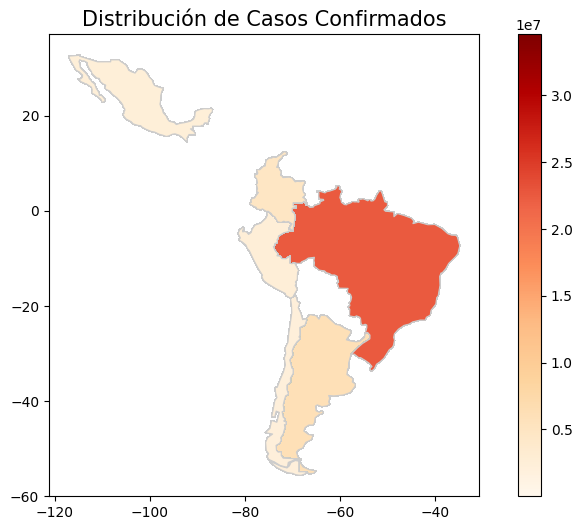

In [14]:
import geopandas as gpd
# Cargar el conjunto de datos de naturalearth_lowres
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Fusionar los datos de naturalearth_lowres con tus datos de casos confirmados
merged = world.merge(data_latam_filtrada, how='left', left_on='name', right_on='country_name')
# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column='cumulative_confirmed', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Añadir título y etiquetas
ax.set_title('Distribución de Casos Confirmados', fontdict={'fontsize': '15', 'fontweight' : '3'})
# Mostrar el mapa
plt.show()